In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import geopandas as gpd
import statsmodels.api as sm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
from sklearn.linear_model import LinearRegression
import matplotlib.colors as mcolors
import plotly.express as px
import folium


# Reading all data:

In [393]:
df_data = pd.read_csv('data_Ana/data_aprobados_colegio_barrio_2022.csv', delimiter=';', encoding='latin1')

df_bcn = df_data[df_data['Municipi'] == 'BARCELONA']

df_bcn_filtered=df_bcn[["Codi districte","Naturalesa","Concert","Resultat de l'avaluació", 'Alumnes avaluats']].copy()

df_bcn_filtered['Codi districte']=df_bcn_filtered['Codi districte']-801900

df_resultados_distrito = df_bcn_filtered.groupby(
        ["Codi districte", "Naturalesa", "Resultat de l'avaluació"]
    )["Alumnes avaluats"].sum().reset_index()

df_resultados_distrito["porcentaje"] = (
    df_resultados_distrito["Alumnes avaluats"] /
    df_resultados_distrito.groupby(["Codi districte", "Naturalesa"])["Alumnes avaluats"].transform("sum")
    * 100
)


df_resultados_distrito.head()



Codi districte Naturalesa     Resultat de l'avaluació  Alumnes avaluats  \
0               1     PRIVAT              NO PROMOCIONEN                71   
1               1     PRIVAT    PROMOCIONEN AMB PENDENTS               162   
2               1     PRIVAT  PROMOCIONEN SENSE PENDENTS               702   
3               1     PÚBLIC              NO PROMOCIONEN                80   
4               1     PÚBLIC    PROMOCIONEN AMB PENDENTS               467   

   porcentaje  
0    7.593583  
1   17.326203  
2   75.080214  
3    6.015038  
4   35.112782

In [394]:
 
df_bcn_disctricts=gpd.read_file("data_Ana/barcelona_districts_clean.geojson")

df_bcn_disctricts.head()

Codi_Districte        nom_districte  \
0               1         Ciutat Vella   
1               2             Eixample   
2               3       Sants-Montjuïc   
3               4            Les Corts   
4               5  Sarrià-Sant Gervasi   

                                    geometria_etrs89  \
0  POLYGON ((431733.736 4582441.816, 431557.5115 ...   
1  POLYGON ((432033.1836 4583665.0318, 431837.083...   
2  MULTIPOLYGON (((431001.6 4577921.76, 430999.65...   
3  POLYGON ((425054.6701 4583672.5601, 425047.220...   
4  MULTIPOLYGON (((421380.6 4587521.9, 421367.7 4...   

                                     geometria_wgs84  \
0  POLYGON ((2.18345134701381 41.3906119681235, 2...   
1  POLYGON ((2.18689546486771 41.4016544763739, 2...   
2  MULTIPOLYGON (((2.17520933722813 41.3498386054...   
3  POLYGON ((2.10341813050026 41.4011020711442, 2...   
4  MULTIPOLYGON (((2.05896991836021 41.4354197742...   

                                            geometry  
0  POLYGON ((2.18345 41.39061, 2.18132 41.39222, ...  
1  POLYGON ((2.1869 41.40165, 2.18453 41.40345, 2...  
2  MULTIPOLYGON (((2.17521 41.34984, 2.17519 41.3...  
3  POLYGON ((2.10342 41.4011, 2.10333 41.40111, 2...  
4  MULTIPOLYGON (((2.05897 41.43542, 2.05881 41.4...

In [395]:
df_rendas=pd.read_csv('data_ana/2022_renda_disponible_llars_per_persona.csv', delimiter=',')

df_rendas_districte = (
    df_rendas
    .groupby("Codi_Districte")["Import_Euros"]
    .mean()
    .reset_index()
)


rentas_idx = df_rendas_districte.set_index("Codi_Districte")["Import_Euros"]

gdf_rendas_districte = df_bcn_disctricts.copy()
gdf_rendas_districte["Import_Euros"] = gdf_rendas_districte["Codi_Districte"].map(rentas_idx)

gdf_rendas_districte.head()


FileNotFoundError: [Errno 2] No such file or directory: 'data_ana/2022_renda_disponible_llars_per_persona.csv'

In [396]:
excel_path = "data_Ana/ist-14034-14994-ac.xlsx"
xls = pd.ExcelFile(excel_path)

for sheet in xls.sheet_names:
    df_ist_u = pd.read_excel(excel_path, sheet_name=sheet)
    df_ist_u.to_csv(f"{sheet}.csv", index=False)
    print(f"Guardado: {sheet}.csv")

df_ist_u=df_ist_u.iloc[35:225,:].reset_index(drop=True)

df_ist_u

excel_path = "data_Ana/ist-15022-ac.xlsx"
xls = pd.ExcelFile(excel_path)

for sheet in xls.sheet_names:
    df_ist = pd.read_excel(excel_path, sheet_name=sheet)
    df_ist.to_csv(f"{sheet}.csv", index=False)
    print(f"Guardado: {sheet}.csv")

df_ist=df_ist.iloc[35:225,:].reset_index(drop=True)

df_ist

Guardado: Descripción.csv
Guardado: Datos.csv
Guardado: Descripción.csv
Guardado: Datos.csv


Unnamed: 0  Población ocupada (%)  \
0    Barcelona 1 (el Liceu i les Drassanes)                   54.7   
1                    Barcelona 2 (Sant Pau)                   55.2   
2                  Barcelona 3 (la Riereta)                   55.9   
3                    Barcelona 4 (el Pedró)                   59.1   
4                      Barcelona 5 (Ponent)                   61.0   
..                                      ...                    ...   
185                 Barcelona 186 (Júpiter)                   64.7   
186              Barcelona 187 (la Palmera)                   67.6   
187         Barcelona 188 (la Verneda Alta)                   66.0   
188        Barcelona 189 (la Verneda Baixa)                   61.9   
189                  Barcelona 190 (la Pau)                   62.7   

     Trabajadores de baja calificación (%)  Población con estudios bajos (%)  \
0                                     12.8                              18.1   
1                                     12.1                              18.8   
2                                     15.1                              21.9   
3                                     13.9                              17.9   
4                                     16.6                              17.4   
..                                     ...                               ...   
185                                   10.0                              15.2   
186                                    7.5                              14.9   
187                                    9.4                              19.2   
188                                   16.4                              20.5   
189                                   13.2                              18.4   

     Población joven sin estudios postobligatorios (%)  \
0                                                 29.4   
1                                                 31.9   
2                                                 39.7   
3                                                 33.7   
4                                                 29.4   
..                                                 ...   
185                                               18.4   
186                                               15.5   
187                                               18.0   
188                                               27.7   
189                                               27.0   

     Extranjeros de países de renta baja o media (%)  \
0                                               37.3   
1                                               36.3   
2                                               46.2   
3                                               40.0   
4                                               41.4   
..                                               ...   
185                                             13.5   
186                                              7.7   
187                                             12.3   
188                                             15.4   
189                                             15.7   

     Renta media por persona (€)  
0                        10867.0  
1                        11050.0  
2                         9245.0  
3                        10316.0  
4                        10609.0  
..                           ...  
185                      15361.0  
186                      16116.0  
187                      14732.0  
188                      12512.0  
189                      12578.0  

[190 rows x 7 columns]

In [497]:
df_ist_barrios=pd.read_csv("data_Ana/ist-14058-15010-mun.csv", delimiter=";")
df_valores_barrios=pd.read_csv("data_Ana/ist-14075-15023-mun.csv", delimiter=";")

df_ist_barrios
df_valores_barrios.dtypes


año                       int64
municipio                object
barrios de Barcelona     object
concepto                 object
estado                  float64
valor                   float64
dtype: object

In [398]:


df_district_barri = pd.DataFrame([
    # CIUTAT VELLA
    ("CIUTAT VELLA", "el Raval  "),
    ("CIUTAT VELLA", "el Barri Gòtic  "),
    ("CIUTAT VELLA", "la Barceloneta  "),
    ("CIUTAT VELLA", "Sant Pere, Santa Caterina i la Ribera  "),

    # EIXAMPLE
    ("EIXAMPLE", "el Fort Pienc  "),
    ("EIXAMPLE", "la Sagrada Família  "),
    ("EIXAMPLE", "la Dreta de l'Eixample  "),
    ("EIXAMPLE", "l'Antiga Esquerra de l'Eixample  "),
    ("EIXAMPLE", "la Nova Esquerra de l'Eixample  "),
    ("EIXAMPLE", "Sant Antoni  "),

    # SANTS - MONTJUÏC
    ("SANTS - MONTJUÏC", "el Poble Sec"),
    ("SANTS - MONTJUÏC", "la Marina del Prat Vermell"),
    ("SANTS - MONTJUÏC", "la Marina de Port  "),
    ("SANTS - MONTJUÏC", "la Font de la Guatlla  "),
    ("SANTS - MONTJUÏC", "Hostafrancs  "),
    ("SANTS - MONTJUÏC", "la Bordeta  "),
    ("SANTS - MONTJUÏC", "Sants  "),
    ("SANTS - MONTJUÏC", "Sants - Badal  "),

    # LES CORTS
    ("LES CORTS", "les Corts  "),
    ("LES CORTS", "la Maternitat i Sant Ramon  "),
    ("LES CORTS", "Pedralbes  "),

    # SARRIÀ - SANT GERVASI
    ("SARRIÀ - SANT GERVASI", "Sarrià  "),
    ("SARRIÀ - SANT GERVASI", "les Tres Torres  "),
    ("SARRIÀ - SANT GERVASI", "Sant Gervasi - la Bonanova  "),
    ("SARRIÀ - SANT GERVASI", "Sant Gervasi - Galvany  "),
    ("SARRIÀ - SANT GERVASI", "el Putxet i el Farró  "),
    ("SARRIÀ - SANT GERVASI", "Vallvidrera, el Tibidabo i les Planes  "),

    # GRÀCIA
    ("GRÀCIA", "la Salut  "),
    ("GRÀCIA", "la Vila de Gràcia  "),
    ("GRÀCIA", "el Camp d'en Grassot i Gràcia Nova  "),
    ("GRÀCIA", "el Coll  "),
    ("GRÀCIA", "Vallcarca i els Penitents  "),

    # HORTA - GUINARDÓ
    ("HORTA - GUINARDÓ", "el Baix Guinardó  "),
    ("HORTA - GUINARDÓ", "Can Baró  "),
    ("HORTA - GUINARDÓ", "el Guinardó  "),
    ("HORTA - GUINARDÓ", "la Font d'en Fargues  "),
    ("HORTA - GUINARDÓ", "el Carmel  "),
    ("HORTA - GUINARDÓ", "la Teixonera  "),
    ("HORTA - GUINARDÓ", "Sant Genís dels Agudells  "),
    ("HORTA - GUINARDÓ", "Montbau  "),
    ("HORTA - GUINARDÓ", "la Vall d'Hebron  "),
    ("HORTA - GUINARDÓ", "la Clota  "),
    ("HORTA - GUINARDÓ", "Horta  "),

    # NOU BARRIS
    ("NOU BARRIS", "Vilapicina i la Torre Llobeta  "),
    ("NOU BARRIS", "la Guineueta  "),
    ("NOU BARRIS", "les Roquetes  "),
    ("NOU BARRIS", "Porta  "),
    ("NOU BARRIS", "el Turó de la Peira  "),
    ("NOU BARRIS", "Can Peguera  "),
    ("NOU BARRIS", "Canyelles  "),
    ("NOU BARRIS", "Verdun  "),
    ("NOU BARRIS", "la Prosperitat  "),
    ("NOU BARRIS", "la Trinitat Nova  "),
    ("NOU BARRIS", "Torre Baró  "),
    ("NOU BARRIS", "Ciutat Meridiana  "),
    ("NOU BARRIS", "Vallbona  "),

    # SANT ANDREU
    ("SANT ANDREU", "la Trinitat Vella  "),
    ("SANT ANDREU", "Baró de Viver  "),
    ("SANT ANDREU", "el Bon Pastor  "),
    ("SANT ANDREU", "Sant Andreu  "),
    ("SANT ANDREU", "la Sagrera  "),
    ("SANT ANDREU", "el Congrés i els Indians  "),
    ("SANT ANDREU", "Navas  "),

    # SANT MARTÍ
    ("SANT MARTÍ", "el Camp de l'Arpa del Clot  "),
    ("SANT MARTÍ", "el Clot  "),
    ("SANT MARTÍ", "el Parc i la Llacuna del Poblenou  "),
    ("SANT MARTÍ", "la Vila Olímpica del Poblenou  "),
    ("SANT MARTÍ", "el Poblenou  "),
    ("SANT MARTÍ", "Diagonal Mar i el Front Marítim del Poblenou  "),
    ("SANT MARTÍ", "el Besòs i el Maresme  "),
    ("SANT MARTÍ", "Provençals del Poblenou  "),
    ("SANT MARTÍ", "Sant Martí de Provençals  "),
    ("SANT MARTÍ", "la Verneda i la Pau  "),
], columns=["Districte", "BARRI_BCN"])

# Normalizar espacios en los nombres de barrios
df_barris["BARRI_BCN"] = df_barris["BARRI_BCN"].str.strip()
df_district_barri["BARRI_BCN"] = df_district_barri["BARRI_BCN"].str.strip()



In [399]:

resultados = df_resultados_distrito.groupby(['Codi districte', 'Naturalesa']).apply(
    lambda x: pd.Series({
        'Indice': (
            x[x['Resultat de l\'avaluació'] == 'PROMOCIONEN SENSE PENDENTS']['Alumnes avaluats'].sum() * 1 +
            x[x['Resultat de l\'avaluació'] == 'PROMOCIONEN AMB PENDENTS']['Alumnes avaluats'].sum() * 0.5
        ) / x['Alumnes avaluats'].sum() if x['Alumnes avaluats'].sum() > 0 else 0,
        'Total_Alumnes': x['Alumnes avaluats'].sum()
    })
).reset_index()

# Pivotar para el formato deseado
indices_final = resultados.pivot_table(
    index='Codi districte', 
    columns='Naturalesa', 
    values=['Indice', 'Total_Alumnes']
).reset_index()

# Aplanar las columnas multiindex
indices_final.columns = ['Codi districte', 'Indice_Privat', 'Indice_Public', 'Total_Privat', 'Total_Public']

print(indices_final.head())

   Codi districte  Indice_Privat  Indice_Public  Total_Privat  Total_Public
0               1       0.837433       0.764286         935.0        1330.0
1               2       0.907694       0.819287        5173.0        2385.0
2               3       0.863033       0.724196        2110.0        2364.0
3               4       0.933524       0.821094        3678.0        1280.0
4               5       0.941866       0.847361        8403.0        1402.0


C:\Users\anica\AppData\Local\Temp\ipykernel_39640\3272103677.py:1: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [401]:

publicos = df_resultados_distrito[df_resultados_distrito["Naturalesa"] == "PÚBLIC"]
privados = df_resultados_distrito[df_resultados_distrito["Naturalesa"] == "PRIVAT"]

# Convertir columnas clave a int si fuera necesario
publicos["Codi districte"] = publicos["Codi districte"].astype(int)
privados["Codi districte"] = privados["Codi districte"].astype(int)

publicos_psp = publicos[publicos["Resultat de l'avaluació"] == "PROMOCIONEN SENSE PENDENTS"]
privados_psp = privados[privados["Resultat de l'avaluació"] == "PROMOCIONEN SENSE PENDENTS"]


# Convertir clave del geojson
df_bcn_disctricts["Codi_Districte"] = df_bcn_disctricts["Codi_Districte"].astype(int)

publicos_idx = publicos_psp.set_index("Codi districte")["porcentaje"]

gdf_publicos = df_bcn_disctricts.copy()
gdf_publicos["porcentaje"] = gdf_publicos["Codi_Districte"].map(publicos_idx)

privados_idx = privados_psp.set_index("Codi districte")["porcentaje"]

gdf_privados = df_bcn_disctricts.copy()
gdf_privados["porcentaje"] = gdf_privados["Codi_Districte"].map(privados_idx)

resultados["Codi districte"] = resultados["Codi districte"].astype(int)
resultados_idx = resultados.set_index("Codi districte")["Indice"]
#gdf_resultados = df_bcn_disctricts.copy()
#gdf_resultados["Indice_Privat"] = gdf_resultados["Codi_Districte"].map(resultados_idx)
#gdf_resultados["Indice_Public"] = gdf_resultados["Codi_Districte"].map(resultados_idx)






C:\Users\anica\AppData\Local\Temp\ipykernel_39640\303059725.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\anica\AppData\Local\Temp\ipykernel_39640\303059725.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\anica\AppData\Local\Temp\ipykernel_39640\1789936131.py:10: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\anica\AppData\Local\Temp\ipykernel_39640\1789936131.py:11: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




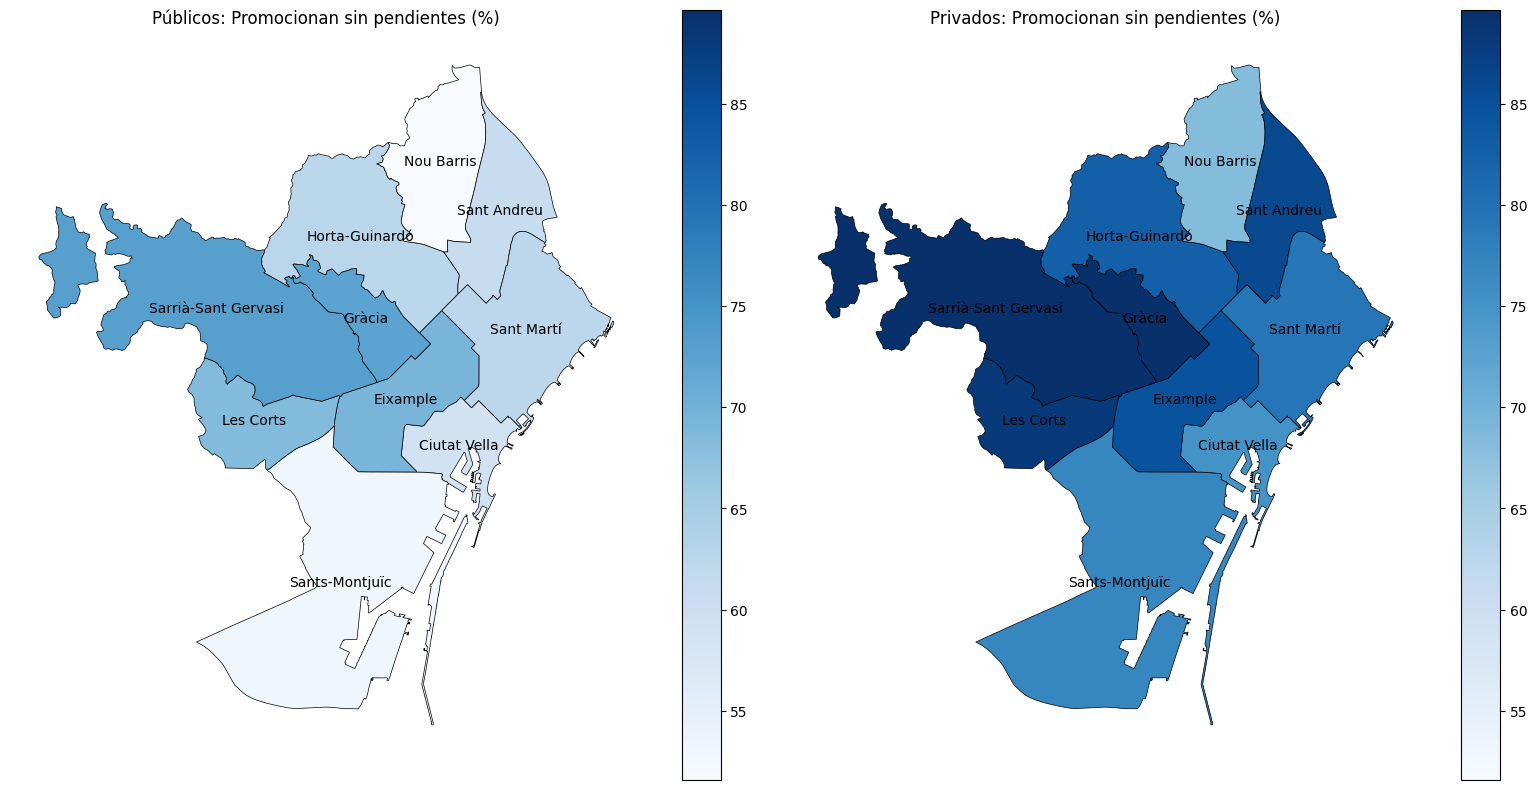

In [402]:
vmin = min(gdf_publicos["porcentaje"].min(),
           gdf_privados["porcentaje"].min())

vmax = max(gdf_publicos["porcentaje"].max(),
           gdf_privados["porcentaje"].max())



# Crear centroides (GeoPandas puede avisar → es normal)
gdf_publicos["centroid"] = gdf_publicos.geometry.centroid
gdf_privados["centroid"] = gdf_privados.geometry.centroid



# vmin / vmax ya calculados previamente
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# --- Mapa públicos ---
gdf_publicos.plot(
    column="porcentaje",
    cmap="Blues",
    legend=True,
    vmin=vmin,
    vmax=vmax,
    edgecolor="black",
    linewidth=0.5,
    ax=ax[0]
)
ax[0].set_title("Públicos: Promocionan sin pendientes (%)")
ax[0].axis("off")

# Añadir nombres
for idx, row in gdf_publicos.iterrows():
    ax[0].text(
        row["centroid"].x,
        row["centroid"].y,
        row["nom_districte"],
        fontsize=10,
        ha="center",
        va="center",
        color="black"
    )

# --- Mapa privados ---
gdf_privados.plot(
    column="porcentaje",
    cmap="Blues",
    legend=True,
    vmin=vmin,
    vmax=vmax,
    edgecolor="black",
    linewidth=0.5,
    ax=ax[1]
)
ax[1].set_title("Privados: Promocionan sin pendientes (%)")
ax[1].axis("off")

# Añadir nombres
for idx, row in gdf_privados.iterrows():
    ax[1].text(
        row["centroid"].x,
        row["centroid"].y,
        row["nom_districte"],
        fontsize=10,
        ha="center",
        va="center",
        color="black"
    )

plt.tight_layout()
plt.show()


C:\Users\anica\AppData\Local\Temp\ipykernel_39640\133195456.py:20: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




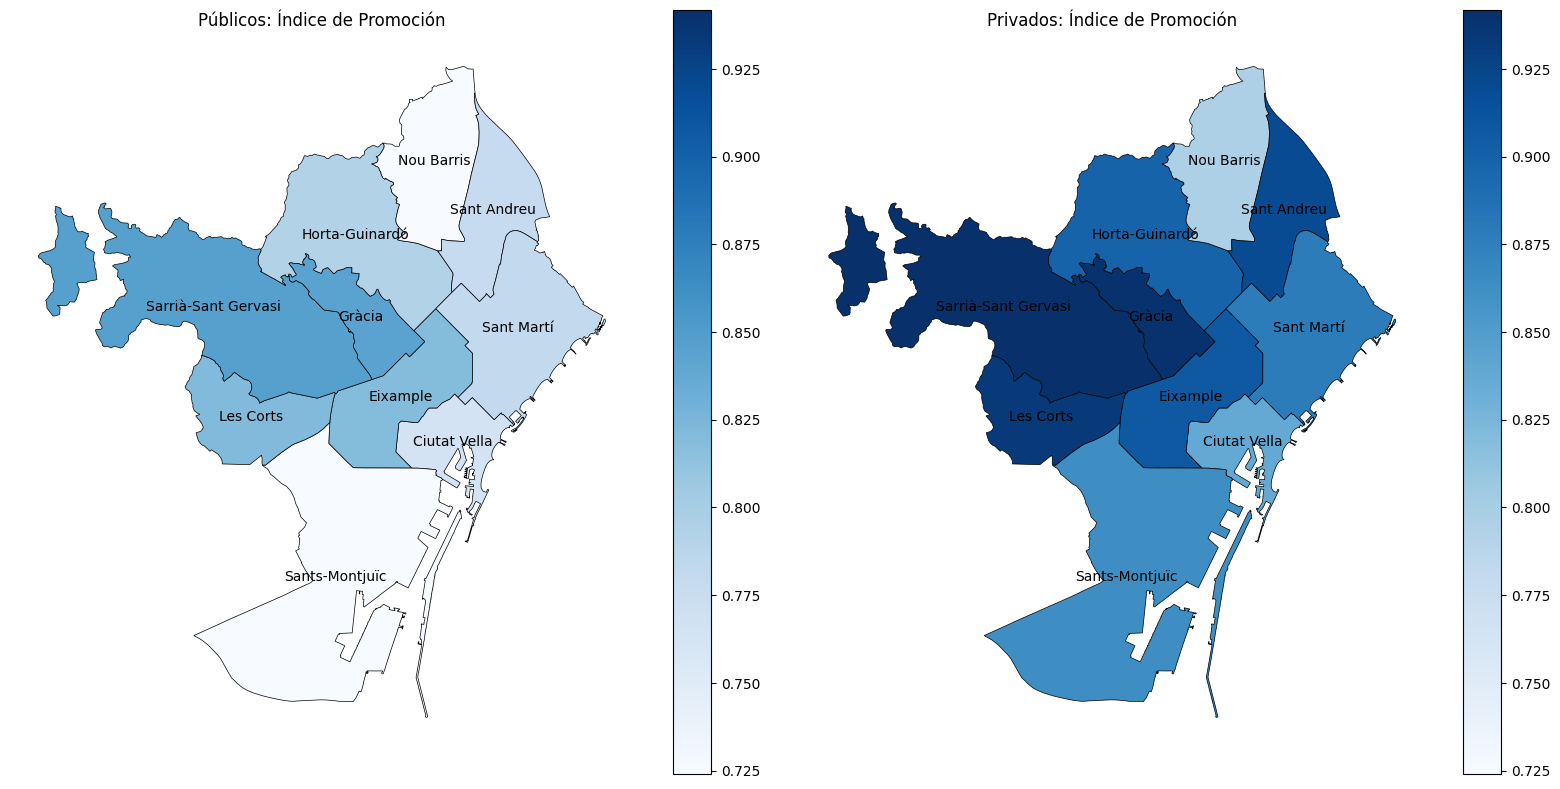

In [403]:
# Asegurar que el código distrito es entero
resultados["Codi districte"] = resultados["Codi districte"].astype(int)

# Crear Series separadas para público y privado
resultados_public = resultados[resultados["Naturalesa"] == "PÚBLIC"].set_index("Codi districte")["Indice"]
resultados_privat = resultados[resultados["Naturalesa"] == "PRIVAT"].set_index("Codi districte")["Indice"]

# Crear el GeoDataFrame
gdf_resultados = df_bcn_disctricts.copy()

# Mapear correctamente
gdf_resultados["Indice_Public"] = gdf_resultados["Codi_Districte"].map(resultados_public)
gdf_resultados["Indice_Privat"] = gdf_resultados["Codi_Districte"].map(resultados_privat)

# Ahora puedes calcular vmin y vmax correctamente
vmin = min(gdf_resultados["Indice_Public"].min(), gdf_resultados["Indice_Privat"].min())
vmax = max(gdf_resultados["Indice_Public"].max(), gdf_resultados["Indice_Privat"].max())

# Crear centroides
gdf_resultados["centroid"] = gdf_resultados.geometry.centroid

# Crear el plot
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# --- Mapa públicos ---
gdf_resultados.plot(
    column="Indice_Public",
    cmap="Blues",
    legend=True,
    vmin=vmin,
    vmax=vmax,
    edgecolor="black",
    linewidth=0.5,
    ax=ax[0]
)
ax[0].set_title("Públicos: Índice de Promoción")
ax[0].axis("off")

# Añadir nombres
for idx, row in gdf_resultados.iterrows():
    ax[0].text(
        row["centroid"].x,
        row["centroid"].y,
        row["nom_districte"],
        fontsize=10,
        ha="center",
        va="center",
        color="black"
    )

# --- Mapa privados ---
gdf_resultados.plot(
    column="Indice_Privat",
    cmap="Blues",
    legend=True,
    vmin=vmin,
    vmax=vmax,
    edgecolor="black",
    linewidth=0.5,
    ax=ax[1]
)
ax[1].set_title("Privados: Índice de Promoción")
ax[1].axis("off")

# Añadir nombres
for idx, row in gdf_resultados.iterrows():
    ax[1].text(
        row["centroid"].x,
        row["centroid"].y,
        row["nom_districte"],
        fontsize=10,
        ha="center",
        va="center",
        color="black"
    )

plt.tight_layout()
plt.show()


In [404]:
# Filtrar solo públicos y normalizar
gdf_publicos = gdf_resultados.copy()

# Normalizar el índice entre 0 y 1
indice_public = gdf_publicos["Indice_Public"]
min_val = indice_public.min()
max_val = indice_public.max()

# Aplicar normalización min-max
gdf_publicos["Indice_Normalizado"] = (indice_public - min_val) / (max_val - min_val)

# Verificar resultado
print("Estadísticas del índice normalizado:")
print(f"Mínimo: {gdf_publicos['Indice_Normalizado'].min():.3f}")
print(f"Máximo: {gdf_publicos['Indice_Normalizado'].max():.3f}")
print(f"Media: {gdf_publicos['Indice_Normalizado'].mean():.3f}")

Estadísticas del índice normalizado:
Mínimo: 0.000
Máximo: 1.000
Media: 0.532


C:\Users\anica\AppData\Local\Temp\ipykernel_39640\1584653760.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




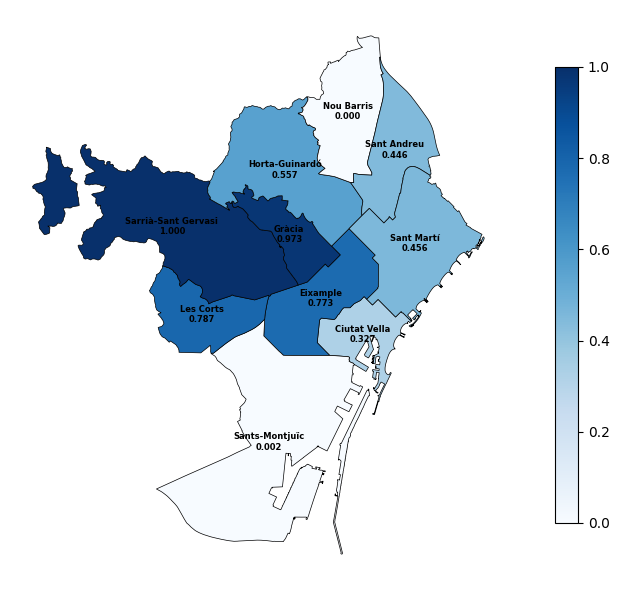


📊 RESUMEN DE ÍNDICES NORMALIZADOS - PÚBLICOS
      nom_districte  Indice_Public  Indice_Normalizado
Sarrià-Sant Gervasi       0.847361            1.000000
             Gràcia       0.844020            0.972931
          Les Corts       0.821094            0.787193
           Eixample       0.819287            0.772557
     Horta-Guinardó       0.792731            0.557406
         Sant Martí       0.780253            0.456319
        Sant Andreu       0.779006            0.446209
       Ciutat Vella       0.764286            0.326954
     Sants-Montjuïc       0.724196            0.002163
         Nou Barris       0.723929            0.000000


In [405]:
# Filtrar y normalizar índices públicos
gdf_publicos = gdf_resultados.copy()

# Normalizar el índice entre 0 y 1
indice_public = gdf_publicos["Indice_Public"]
min_val = indice_public.min()
max_val = indice_public.max()

gdf_publicos["Indice_Normalizado"] = (indice_public - min_val) / (max_val - min_val)

# Crear centroides
gdf_publicos["centroid"] = gdf_publicos.geometry.centroid

# Crear el plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Mapa de índices normalizados
gdf_publicos.plot(
    column="Indice_Normalizado",
    cmap="Blues",  # Esquema de colores rojo-amarillo-verde
    legend=True,
    vmin=0,
    vmax=1,
    edgecolor="black",
    linewidth=0.5,
    ax=ax,
    legend_kwds={
        'shrink': 0.8,
        #'label': 'Índice Normalizado (0-1)'
    }
)

# ax.set_title("Índice de Promoción Normalizado - Centros Públicos por Distrito", 
#              fontsize=16, fontweight='bold', pad=20)
ax.axis("off")

# Añadir nombres de distritos y valores
for idx, row in gdf_publicos.iterrows():
    ax.text(
        row["centroid"].x,
        row["centroid"].y,
        f"{row['nom_districte']}\n{row['Indice_Normalizado']:.3f}",
        fontsize=6,
        ha="center",
        va="center",
        color="black",
        weight="bold",
        #bbox=dict(boxstyle="round,pad=0.3", facecolor=None, alpha=0.8, edgecolor="none")
    )

# Añadir información adicional en la esquina
# ax.text(
#     0.02, 0.02, 
#     f"Índice mínimo: {min_val:.3f}\nÍndice máximo: {max_val:.3f}",
#     transform=ax.transAxes,
#     fontsize=10,
#     bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.9)
# )

plt.tight_layout()
plt.show()

# Mostrar tabla resumen
print("\n📊 RESUMEN DE ÍNDICES NORMALIZADOS - PÚBLICOS")
print("="*50)
resumen = gdf_publicos[["nom_districte", "Indice_Public", "Indice_Normalizado"]].sort_values("Indice_Normalizado", ascending=False)
print(resumen.to_string(index=False))

In [406]:
df_censo=pd.read_csv("data_Ana/2022_pad_mdbas.csv")
df_censo

Data_Referencia  Codi_Districte Nom_Districte  Codi_Barri  \
0         2022-01-01               1  Ciutat Vella           1   
1         2022-01-01               1  Ciutat Vella           1   
2         2022-01-01               1  Ciutat Vella           1   
3         2022-01-01               1  Ciutat Vella           1   
4         2022-01-01               1  Ciutat Vella           1   
...              ...             ...           ...         ...   
1063      2022-01-01              10    Sant Martí          73   
1064      2022-01-01              10    Sant Martí          73   
1065      2022-01-01              10    Sant Martí          73   
1066      2022-01-01              10    Sant Martí          73   
1067      2022-01-01              10    Sant Martí          73   

                Nom_Barri  AEB  Seccio_Censal  Valor  
0                el Raval    1           1001   1302  
1                el Raval    1           1002   1400  
2                el Raval    2           1003   3467  
3                el Raval    2           1004   2945  
4                el Raval    3           1005   2338  
...                   ...  ...            ...    ...  
1063  la Verneda i la Pau  232          10139   1682  
1064  la Verneda i la Pau  233          10140   1633  
1065  la Verneda i la Pau  233          10141   1126  
1066  la Verneda i la Pau  233          10142   1622  
1067  la Verneda i la Pau  233          10143   1805  

[1068 rows x 8 columns]

In [494]:
df_ist_barrios.head()


año  municipio                   barrios de Barcelona  \
0  2022  Barcelona                               el Raval   
1  2022  Barcelona                         el Barri Gòtic   
2  2022  Barcelona                         la Barceloneta   
3  2022  Barcelona  Sant Pere, Santa Caterina i la Ribera   
4  2022  Barcelona                          el Fort Pienc   

                            concepto  estado  valor  
0  Índice socioeconómico territorial     NaN   78.3  
1  Índice socioeconómico territorial     NaN   79.3  
2  Índice socioeconómico territorial     NaN   96.3  
3  Índice socioeconómico territorial     NaN  102.5  
4  Índice socioeconómico territorial     NaN  110.8

In [412]:
# Paso 1: Unir los dataframes usando los nombres de barrio
df_completo = df_ist_barrios.merge(
    df_censo[['Nom_Barri', 'Codi_Districte', 'Nom_Districte', 'Valor']],
    left_on='barrios de Barcelona', 
    right_on='Nom_Barri',
    how='left'
)

# Renombrar la columna de población para claridad
df_completo = df_completo.rename(columns={'Valor': 'poblacion'})

# Paso 2: Calcular el valor ponderado
df_completo['valor_ponderado'] = df_completo['valor'] * df_completo['poblacion']

# Paso 3: Agrupar por distrito y calcular la media ponderada
df_por_distrito = df_completo.groupby(['Codi_Districte', 'Nom_Districte']).apply(
    lambda x: x['valor_ponderado'].sum() / x['poblacion'].sum()
).reset_index()

# Renombrar la columna resultante a IST
df_por_distrito = df_por_distrito.rename(columns={0: 'IST'})

# Seleccionar solo las columnas requeridas
df_final_u = df_por_distrito[['Codi_Districte', 'Nom_Districte', 'IST']]

# Mostrar el resultado
print(df_final_u.head())
print(f"\nDimensiones del dataframe final: {df_final_u.shape}")

   Codi_Districte        Nom_Districte         IST
0             1.0         Ciutat Vella   86.066058
1             2.0             Eixample  115.359010
2             3.0       Sants-Montjuïc  104.025474
3             4.0            Les Corts  121.208733
4             5.0  Sarrià-Sant Gervasi  128.082333

Dimensiones del dataframe final: (10, 3)


C:\Users\anica\AppData\Local\Temp\ipykernel_39640\3260228476.py:16: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [418]:
# Paso 1: Unir los dataframes
df_completo = df_valores_barrios.merge(
    df_censo[['Nom_Barri', 'Codi_Districte', 'Nom_Districte', 'Valor']],
    left_on='barrios de Barcelona', 
    right_on='Nom_Barri',
    how='left'
)

# Renombrar la columna de población
df_completo = df_completo.rename(columns={'Valor': 'poblacion'})

# Paso 2: Calcular el valor ponderado
df_completo['valor_ponderado'] = df_completo['valor'] * df_completo['poblacion']

# Paso 3: Agrupar por distrito Y concepto, calculando la media ponderada para cada uno
df_agrupado = df_completo.groupby([
    'año', 
    'Codi_Districte', 
    'Nom_Districte', 
    'concepto'
]).apply(
    lambda x: x['valor_ponderado'].sum() / x['poblacion'].sum() if x['poblacion'].sum() > 0 else 0
).reset_index()

# Renombrar la columna resultante
df_agrupado = df_agrupado.rename(columns={0: 'valor_medio_ponderado'})

# Paso 4: Pivotar la tabla para que cada concepto sea una columna
df_final = df_agrupado.pivot_table(
    index=['año', 'Codi_Districte', 'Nom_Districte'],
    columns='concepto',
    values='valor_medio_ponderado'
).reset_index()

# Limpiar el nombre de las columnas después del pivot
df_final.columns.name = None  # Eliminar el nombre del índice de columnas

df_final.head()

C:\Users\anica\AppData\Local\Temp\ipykernel_39640\4237171444.py:21: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



año  Codi_Districte        Nom_Districte  \
0  2022             1.0         Ciutat Vella   
1  2022             2.0             Eixample   
2  2022             3.0       Sants-Montjuïc   
3  2022             4.0            Les Corts   
4  2022             5.0  Sarrià-Sant Gervasi   

   extranjeros de países de renta baja o media (%)  \
0                                        28.285436   
1                                        12.920815   
2                                        13.510434   
3                                         8.342406   
4                                         5.558717   

   población con estudios bajos (%)  \
0                         16.295958   
1                          8.034495   
2                         12.989487   
3                          7.865229   
4                          4.761312   

   población joven sin estudios postobligatorios (%)  población ocupada (%)  \
0                                          25.697776              55.672321   
1                                           8.782711              66.037737   
2                                          16.684899              65.182351   
3                                           6.744890              67.442263   
4                                           5.913886              68.046829   

   renta media por persona (€)  trabajadores de baja calificación (%)  
0                 12937.970197                              11.117239  
1                 20645.846877                               4.511707  
2                 16578.446931                               8.622078  
3                 23788.499716                               3.789849  
4                 27398.451293                               2.609913

In [ ]:

gdf_u = df_bcn_disctricts.merge(
    df_final,
    left_on="Codi_Districte",   # columna del GeoDataFrame
    right_on="Codi_Districte"         # columna recién creada en df_ist
)

col = gdf_u["IST"]
pivot = 100  # punto medio deseado

# Separar valores menores y mayores a 100
min_val = col.min()
max_val = col.max()

# Normalización piecewise
gdf_u["idx_norm"] = np.where(
    col <= pivot,
    0.5 * (col - min_val) / (pivot - min_val),  # escala [min → 100] a [0 → 0.5]
    0.5 + 0.5 * (col - pivot) / (max_val - pivot)  # escala [100 → max] a [0.5 → 1]
)


C:\Users\anica\AppData\Local\Temp\ipykernel_39640\1387512975.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\anica\AppData\Local\Temp\ipykernel_39640\1387512975.py:13: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




(np.float64(2.043547300698213),
 np.float64(2.236830600437898),
 np.float64(41.30947556993511),
 np.float64(41.47586054485192))

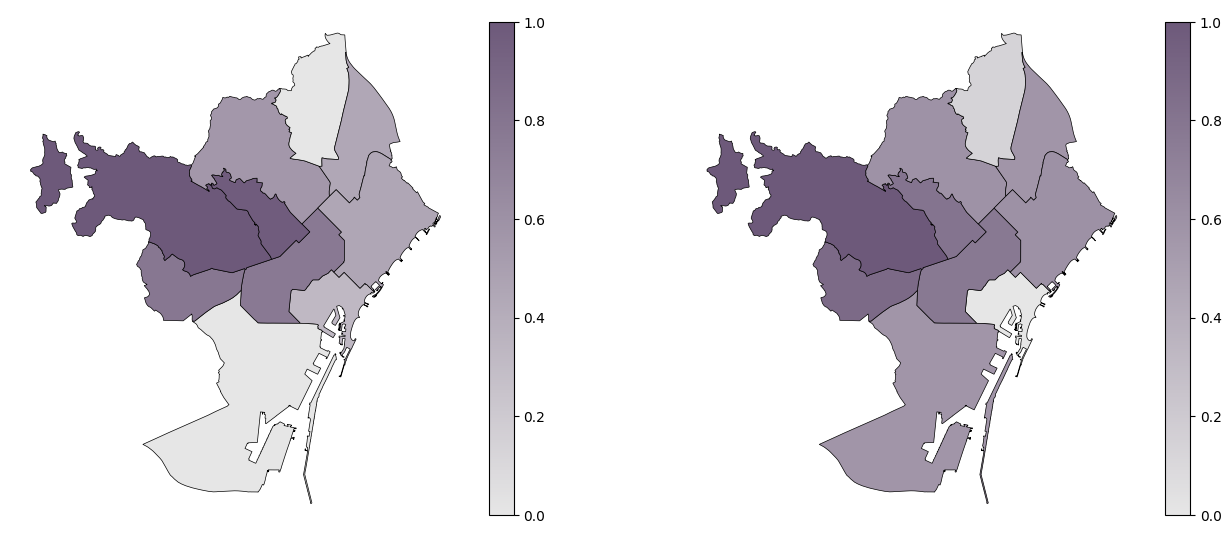

In [409]:
color="#9A8C98"
color="#6D597A"
color="#A3A847"
color="#6D597A"
color_2="#4CAF50"
cmap_custom = LinearSegmentedColormap.from_list("custom_cmap", ["#E6E6E6FF", color])
cmap_custom_2 = LinearSegmentedColormap.from_list("custom_cmap", ["#DFD8D8FF", color_2])



# Crear centroides (GeoPandas puede avisar → es normal)
gdf_publicos["centroid"] = gdf_publicos.geometry.centroid
gdf_rendas_districte["centroid"] = gdf_rendas_districte.geometry.centroid



# vmin / vmax ya calculados previamente
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# --- Mapa públicos ---
gdf_publicos.plot(
    column="Indice_Normalizado",
    cmap=cmap_custom,
    legend=True,
    edgecolor="black",
    linewidth=0.5,
    legend_kwds={'shrink': 0.8, 'label': ''},
    ax=ax[0]
)
#ax[0].set_title("Públicos: Promocionan sin pendientes (%)")
ax[0].axis("off")

# Añadir nombres
# for idx, row in gdf_publicos.iterrows():
#     ax[0].text(
#         row["centroid"].x,
#         row["centroid"].y,
#         row["nom_districte"],
#         fontsize=10,
#         ha="center",
#         va="center",
#         color="black"
#     )

# --- Mapa privados ---
gdf_u.plot(
    column="idx_norm",
    cmap=cmap_custom,
    legend=True,
    edgecolor="black",
    linewidth=0.5,
    legend_kwds={'shrink': 0.8, 'label': ''},
    ax=ax[1]
)
#ax[1].set_title("Renta anual media por unidad familiar")
ax[1].axis("off")

In [422]:
df_final

año  Codi_Districte        Nom_Districte  \
0  2022             1.0         Ciutat Vella   
1  2022             2.0             Eixample   
2  2022             3.0       Sants-Montjuïc   
3  2022             4.0            Les Corts   
4  2022             5.0  Sarrià-Sant Gervasi   
5  2022             6.0               Gràcia   
6  2022             7.0       Horta-Guinardó   
7  2022             8.0           Nou Barris   
8  2022             9.0          Sant Andreu   
9  2022            10.0           Sant Martí   

   extranjeros de países de renta baja o media (%)  \
0                                        28.285436   
1                                        12.920815   
2                                        13.510434   
3                                         8.342406   
4                                         5.558717   
5                                         9.093872   
6                                        11.373784   
7                                        16.370332   
8                                        11.201779   
9                                        12.677120   

   población con estudios bajos (%)  \
0                         16.295958   
1                          8.034495   
2                         12.989487   
3                          7.865229   
4                          4.761312   
5                          8.390078   
6                         14.133628   
7                         18.643229   
8                         13.874435   
9                         13.095586   

   población joven sin estudios postobligatorios (%)  población ocupada (%)  \
0                                          25.697776              55.672321   
1                                           8.782711              66.037737   
2                                          16.684899              65.182351   
3                                           6.744890              67.442263   
4                                           5.913886              68.046829   
5                                           8.616771              68.584589   
6                                          15.913891              67.776036   
7                                          27.097918              63.530236   
8                                          19.612324              68.139323   
9                                          16.495002              66.233437   

   renta media por persona (€)  trabajadores de baja calificación (%)  
0                 12937.970197                              11.117239  
1                 20645.846877                               4.511707  
2                 16578.446931                               8.622078  
3                 23788.499716                               3.789849  
4                 27398.451293                               2.609913  
5                 20009.717803                               4.203620  
6                 16311.949398                               8.333449  
7                 13306.886931                              14.859178  
8                 16139.123283                               9.057435  
9                 16913.610072                               7.651126

C:\Users\anica\AppData\Local\Temp\ipykernel_39640\1072792647.py:45: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




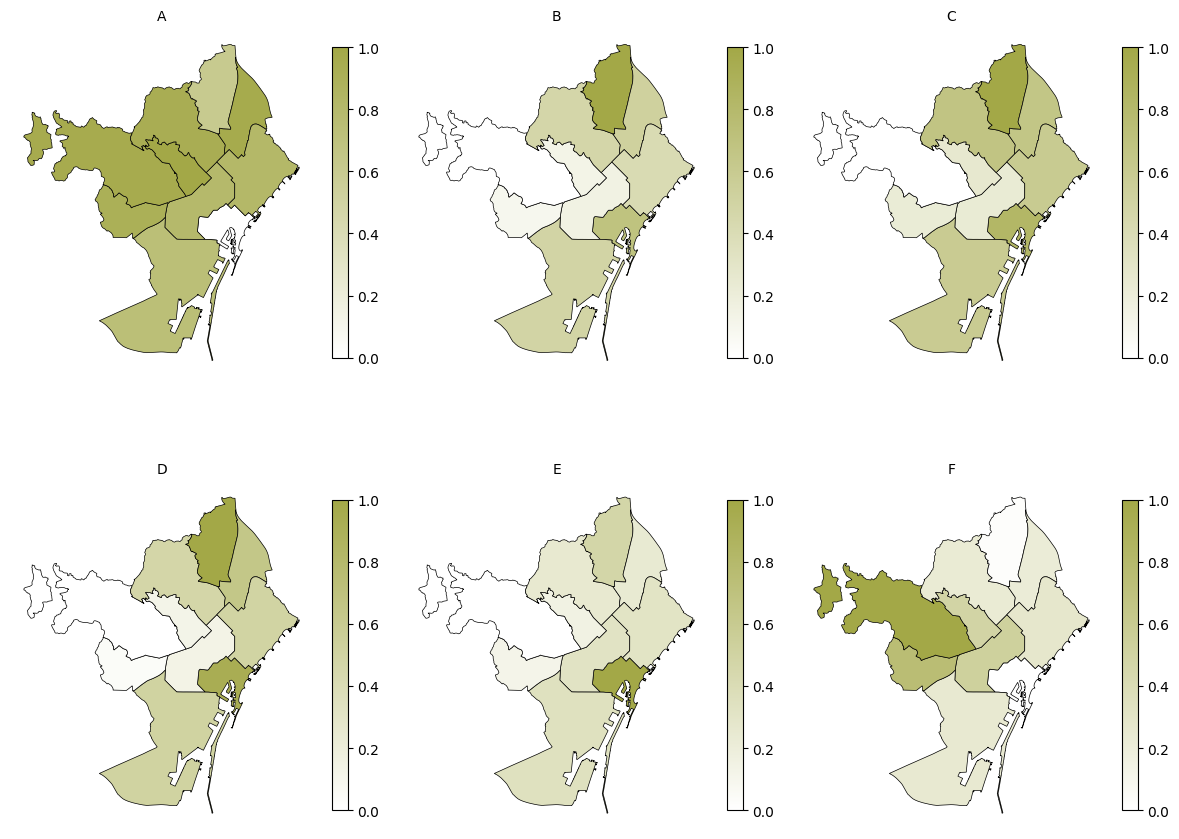

In [500]:

df_ist.index = df_ist.index.astype(int)
df_ist["Codi_Districte"] = df_ist.index

# Columnas que quieres normalizar y mapear
cols = [
    "población ocupada (%)",
    "trabajadores de baja calificación (%)",
    "población con estudios bajos (%)",
    "población joven sin estudios postobligatorios (%)"	,
    "extranjeros de países de renta baja o media (%)",
    "renta media por persona (€)",	
    
]
cols_norm=[]
cols_norm = [
    "Employed population",
    "Low-skilled workers",
    "Population with low education",
    "Young population without post-compulsory studies",
    "Foreigners from low- or middle-income countries",
    "Average income per person"
]

cols_norm = [
    "A",
    "B",
    "C",
    "D",
    "E",
    "F"
]

# =============================================
# 2. Unir con GeoDataFrame
# =============================================
gdf = df_bcn_disctricts.merge(
    df_final,
    left_on="Codi_Districte",   # columna del GeoDataFrame
    right_on="Codi_Districte"         # columna recién creada en df_ist
)



# Añadir centroides
gdf["centroid"] = gdf.geometry.centroid

# =============================================
# 3. Normalización min–max
# =============================================

for col,col_norm in zip(cols, cols_norm): 
    gdf[col_norm] = (gdf[col] - gdf[col].min()) / (gdf[col].max() - gdf[col].min())
    cols_norm.append(col_norm)

# =============================================
# 4. Función para dibujar mapas normalizados
# =============================================
color = "#A3A847"  # tu color

# Crear cmap de blanco → tu color
cmap_custom = LinearSegmentedColormap.from_list("custom_cmap", ["#FFFFFF", color])


def plot_maps(gdf, columns, cmap="Greens"):
    n = len(columns)
    fig, axes = plt.subplots(2, 3, figsize=(12, 10))

    axes = axes.flatten()

    for ax, col in zip(axes, columns):

        gdf.plot(
            column=col,
            cmap=cmap_custom,
            legend=True,
            vmin=0,
            vmax=1,
            edgecolor="black",
            linewidth=0.5,
            legend_kwds={
                'shrink': 0.6,
            },
            ax=ax
        )

        ax.set_title(col, fontsize=10)
        ax.axis("off")

        # Añadir nombres de distrito sobre los polígonos
        # for idx, row in gdf.iterrows():
        #     ax.text(
        #         row["centroid"].x,
        #         row["centroid"].y,
        #         row["nom_districte"],
        #         fontsize=9,
        #         ha="center",
        #         va="center",
        #         color="black"
        #     )

    plt.tight_layout()
    plt.show()


plot_maps(gdf, cols_norm)


In [501]:
cols_norm=[]
cols_norm = [
    "Población ocupada",
    "Trabajadores de baja calificación",
    "Población con estudios bajos",
    "Población joven sin estudios postobligatorios",
    "Extranjeros de países de renta baja o media",
    "Renta media por persona"
]
cols_norm = [
    "Employed population",
    "Low-skilled workers",
    "Population with low education",
    "Young population without post-compulsory studies",
    "Foreigners from low- or middle-income countries",
    "Average income per person"
]
cols_norm = [
    "A",
    "B",
    "C",
    "D",
    "E",
    "F"
]
cols_norm

['A', 'B', 'C', 'D', 'E', 'F']


Correlación con Índice Público:

   Correlación
F     0.805283
A     0.498658
E    -0.575716
D    -0.845129
C    -0.862553
B    -0.882627


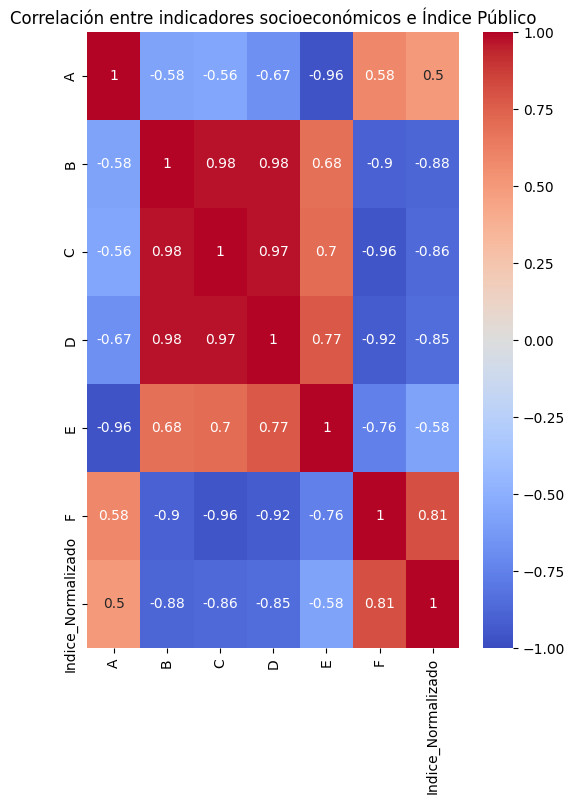

In [502]:
# =============================================
# 1. Combinar indicadores normalizados y la nota pública
# =============================================

df_corr = gdf[
    ["Codi_Districte"] + cols_norm
].merge(
    gdf_publicos[["Codi_Districte", "Indice_Normalizado"]],
    on="Codi_Districte"
)

df_corr = df_corr.loc[:, ~df_corr.columns.duplicated()]

# =============================================
# 2. Matriz de correlación
# =============================================

corr = df_corr[cols_norm + ["Indice_Normalizado"]].corr()
corr = corr.loc[:, ~corr.columns.duplicated()]

# Correlaciones solo contra el índice público
corr_with_public = corr["Indice_Normalizado"].drop("Indice_Normalizado")

# =============================================
# 3. Tabla ordenada
# =============================================

corr_table = corr_with_public.to_frame(name="Correlación").sort_values("Correlación", ascending=False)
print("\nCorrelación con Índice Público:\n")
print(corr_table)

# =============================================
# 4. Heatmap (opcional)
# =============================================


plt.figure(figsize=(6,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlación entre indicadores socioeconómicos e Índice Público")
plt.show()


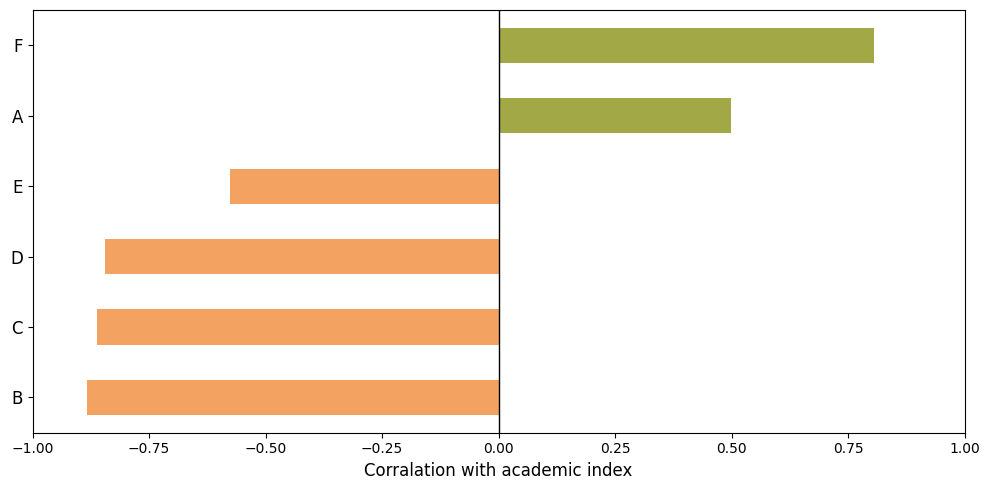

In [503]:


corr = df_corr.corr()["Indice_Normalizado"].drop("Indice_Normalizado").sort_values()

corr_with_public=corr_with_public.sort_values()



plt.figure(figsize=(10,5))
corr_with_public.plot(kind="barh", color=[ "#A3A847" if c>0 else "#F4A261" for c in corr_with_public])
plt.axvline(0, color='black', linewidth=1)
plt.yticks(fontsize=12)
plt.xlabel("Corralation with academic index", fontsize=12)
plt.xlim(-1,1)
#plt.title("Factores socioeconómicos y rendimiento académico público")
plt.tight_layout()
plt.show()


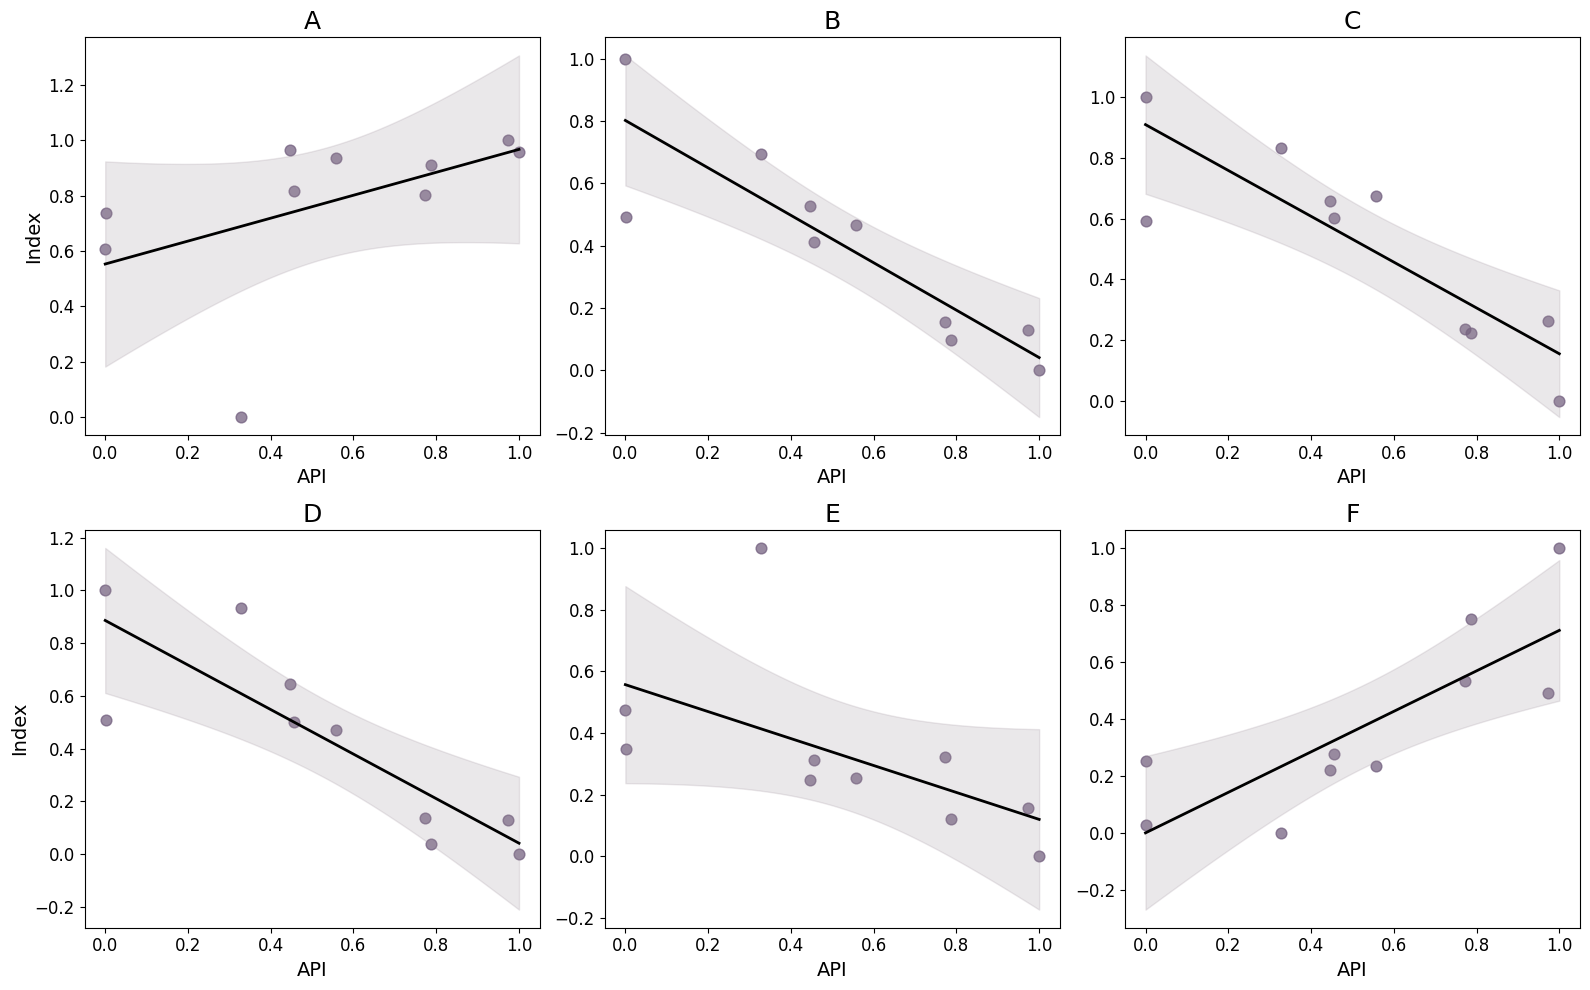

In [522]:
color="#6D597A"


slopes = {}
errors = {}

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, factor in enumerate(cols_norm):
    ax = axes[i]

    X = df_corr["Indice_Normalizado"].values
    y = df_corr[factor].values

    # Añadir constante para statsmodels
    X_sm = sm.add_constant(X)

    model = sm.OLS(y, X_sm).fit()

    # Guardar pendiente y error estándar
    slopes[factor] = model.params[1]
    errors[factor] = model.bse[1]

    # Predicciones con intervalo de confianza
    x_pred = np.linspace(X.min(), X.max(), 200)
    X_pred = sm.add_constant(x_pred)
    y_pred = model.predict(X_pred)
    pred_ci = model.get_prediction(X_pred).conf_int()

    # Plot puntos
    ax.scatter(X, y, s=60, alpha=0.7, color=color)

    # Recta
    ax.plot(x_pred, y_pred, linewidth=2, color='black')

    # Banda de error
    ax.fill_between(x_pred,
                    pred_ci[:, 0],
                    pred_ci[:, 1],
                    alpha=0.2,
                    color="#9A8C98")

    ax.set_title(factor, fontsize=18)
    ax.set_xlabel("API", fontsize=14)
    #ax.set_ylabel("Index", fontsize=14)
    #ax.set_xlim(0,1)
    #ax.set_ylim(0,1)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    #ax.set_xticks([0,0.5,1])
    #ax.set_yticks([0,0.5,1])

axes[0].set_ylabel("Index", fontsize=14)
axes[3].set_ylabel("Index", fontsize=14)
#plt.suptitle("Relación entre factores socioeconómicos e Índice Público", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


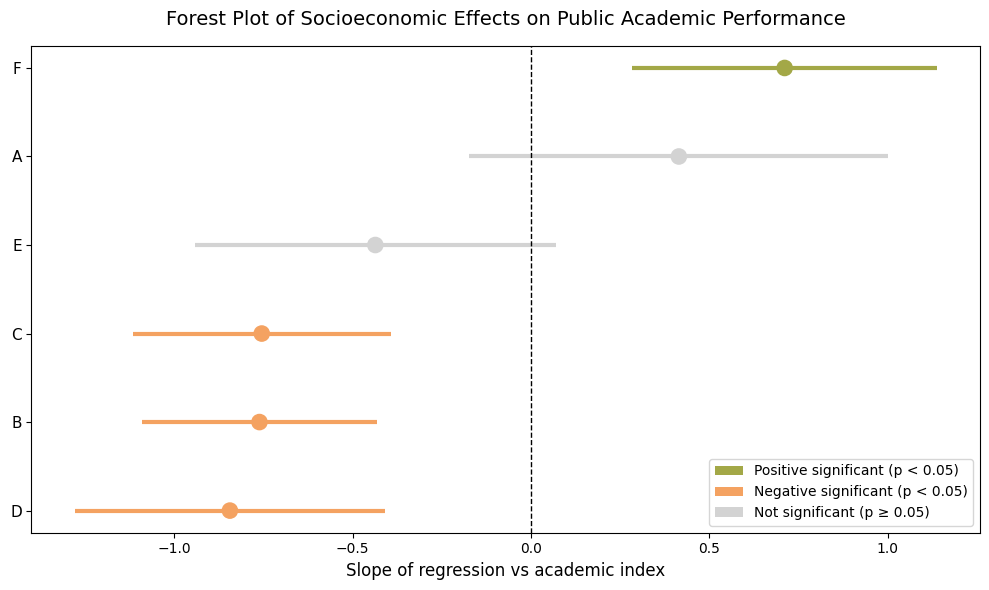

In [523]:


# ========================================
# 1. Cálculo de slopes, errores y CI 95%
# ========================================

results_forest = {}

for factor in cols_norm:
    X = sm.add_constant(df_corr["Indice_Normalizado"].values)
    model = sm.OLS(df_corr[factor].values, X).fit()

    slope  = model.params[1]
    error  = model.bse[1]
    pvalue = model.pvalues[1]

    ci_low, ci_high = model.conf_int(alpha=0.05)[1]

    results_forest[factor] = {
        "slope": slope, "error": error,
        "low": ci_low, "high": ci_high, "p": pvalue
    }

df_forest = pd.DataFrame(results_forest).T
df_forest = df_forest.sort_values("slope")  # ordenar por efecto

# colores según significancia
df_forest["color"] = np.where(
    df_forest["p"] < 0.05,
    np.where(df_forest["slope"] > 0, "#A3A847", "#F4A261"),
    "lightgray"
)

# ========================================
# 2. FOREST PLOT
# ========================================

plt.figure(figsize=(10, 6))
y_positions = np.arange(len(df_forest))

# intervalo de confianza
plt.hlines(
    y_positions,
    df_forest["low"], df_forest["high"],
    color=df_forest["color"],
    linewidth=3
)

# punto estimado (slope)
plt.scatter(
    df_forest["slope"], y_positions,
    color=df_forest["color"], s=120, zorder=3
)

# línea vertical de no efecto
plt.axvline(0, color="black", linestyle="--", linewidth=1)

plt.yticks(y_positions, df_forest.index, fontsize=11)
plt.xlabel("Slope of regression vs academic index", fontsize=12)
plt.title("Forest Plot of Socioeconomic Effects on Public Academic Performance",
          fontsize=14, pad=15)

plt.tight_layout()

# ========================================
# 3. LEYENDA
# ========================================

legend_elements = [
    Patch(facecolor="#A3A847", label="Positive significant (p < 0.05)"),
    Patch(facecolor="#F4A261", label="Negative significant (p < 0.05)"),
    Patch(facecolor="lightgray", label="Not significant (p ≥ 0.05)")
]

plt.legend(handles=legend_elements, fontsize=10, loc="lower right")
plt.show()


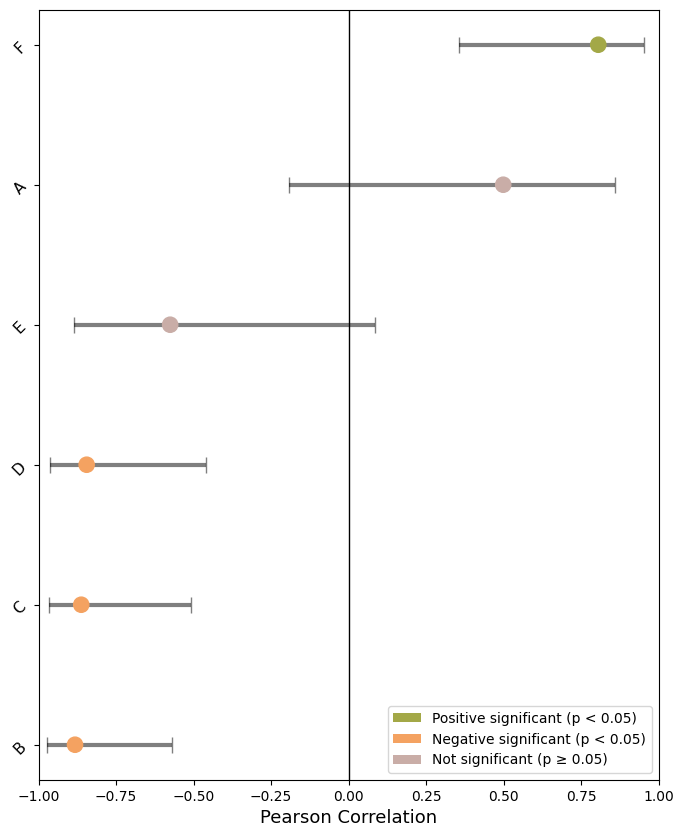

In [524]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


X = df_corr["Indice_Normalizado"].values
n = len(X)
results = []

# --- Calcular correlaciones e IC ---
for factor in cols_norm:
    y = df_corr[factor].values
    r, p = pearsonr(X, y)

    # Transformación Fisher
    z = np.arctanh(r)
    se = 1 / np.sqrt(n - 3)
    z_crit = 1.96 * se
    r_low, r_high = np.tanh(z - z_crit), np.tanh(z + z_crit)

    results.append([factor, r, r_low, r_high, p])

df_res = pd.DataFrame(results, columns=["Factor", "r", "IC_low", "IC_high", "p"])
df_res = df_res.sort_values("r")  # ordenar

# --- Asignar colores según significación ---
def assign_color(r, p):
    if p < 0.05 and r > 0:
        return "#A3A847"  # positivo significativo
    elif p < 0.05 and r < 0:
        return "#F4A261"  # negativo significativo
    else:
        return "#C9ADA7"  # no significativo

df_res["color"] = df_res.apply(lambda row: assign_color(row["r"], row["p"]), axis=1)

# --- FOREST PLOT ---
plt.figure(figsize=(8, 10))

y_pos = range(len(df_res))

# Barras de error
plt.errorbar(
    df_res["r"], y_pos,
    xerr=[df_res["r"] - df_res["IC_low"], df_res["IC_high"] - df_res["r"]],
    fmt='none', color="black", elinewidth=3, alpha=0.5,capsize=6
)

# Puntos
plt.scatter(df_res["r"], y_pos, s=120, color=df_res["color"], zorder=3)

plt.axvline(0, color="black", linewidth=1)

# Etiquetas inclinadas
plt.yticks(y_pos, df_res["Factor"], fontsize=11, rotation=45, ha="right")

plt.xlabel("Pearson Correlation", fontsize=13)
plt.xlim(-1, 1)

legend_elements = [
    Patch(facecolor="#A3A847", label="Positive significant (p < 0.05)"),
    Patch(facecolor="#F4A261", label="Negative significant (p < 0.05)"),
    Patch(facecolor="#C9ADA7", label="Not significant (p ≥ 0.05)")
]

plt.legend(handles=legend_elements, fontsize=10, loc="lower right")
plt.show()

In [525]:
df_res

Factor         r    IC_low   IC_high         p    color
1      B -0.882627 -0.972058 -0.569459  0.000719  #F4A261
2      C -0.862553 -0.967011 -0.509773  0.001318  #F4A261
3      D -0.845129 -0.962562 -0.460579  0.002079  #F4A261
4      E -0.575716 -0.884667  0.084577  0.081580  #C9ADA7
0      A  0.498658 -0.190920  0.858688  0.142355  #C9ADA7
5      F  0.805283  0.356309  0.952147  0.004936  #A3A847

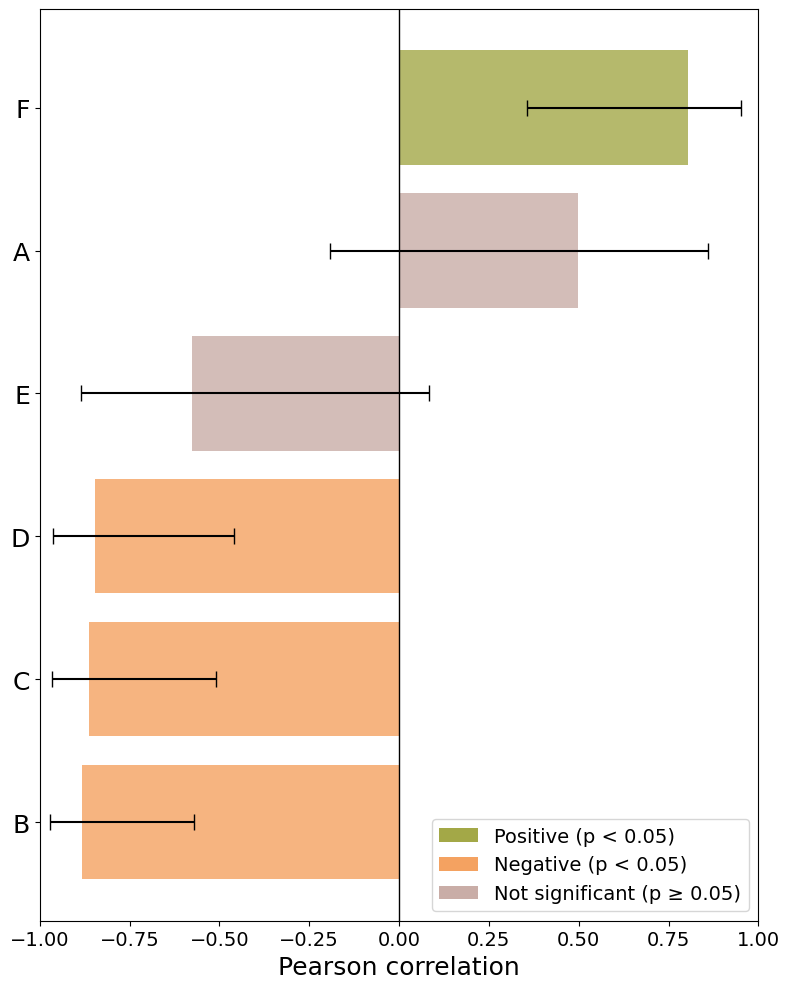

In [537]:
import matplotlib.pyplot as plt
import numpy as np

# Umbral de significancia
alpha = 0.05

# Colores:
#   positivo significativo → verde apagado
#   negativo significativo → ladrillo
#   no significativo → gris
color_pos = "#A3A847"   # verde musgo
color_neg = "#F4A261"   # rojizo
color_nosig = "#C9ADA7" # gris neutro

# Asignación de colores según p-value y signo
df_res["color"] = df_res.apply(
    lambda row: (
        color_pos if (row["p"] < alpha and row["r"] > 0) else
        color_neg if (row["p"] < alpha and row["r"] < 0) else
        color_nosig
    ),
    axis=1
)

# Ordenar por correlación
df_res = df_res.sort_values("r")

# Posiciones de barras
y_pos = np.arange(len(df_res))

plt.figure(figsize=(8, 10))

# Dibujar barras
plt.barh(
    y_pos,
    df_res["r"],
    color=df_res["color"],
    alpha=0.8,
    xerr=[df_res["r"] - df_res["IC_low"], df_res["IC_high"] - df_res["r"]],
    capsize=6,
    ecolor="black",       # barras de error negras
    linewidth=1.5
)

# Línea vertical en 0
plt.axvline(0, color="black", linewidth=1)

# Etiquetas
plt.yticks(y_pos, df_res["Factor"], fontsize=18)
plt.xticks(fontsize=14)
plt.xlabel("Pearson correlation", fontsize=18)
plt.xlim(-1, 1)

legend_elements = [
    Patch(facecolor="#A3A847", label="Positive (p < 0.05)"),
    Patch(facecolor="#F4A261", label="Negative (p < 0.05)"),
    Patch(facecolor="#C9ADA7", label="Not significant (p ≥ 0.05)")
]

plt.legend(handles=legend_elements, fontsize=14, loc="lower right")

#plt.title("Correlation with Academic Public Index", fontsize=15, pad=15)
plt.tight_layout()
plt.show()


C:\Users\anica\AppData\Local\Temp\ipykernel_39640\47390624.py:35: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



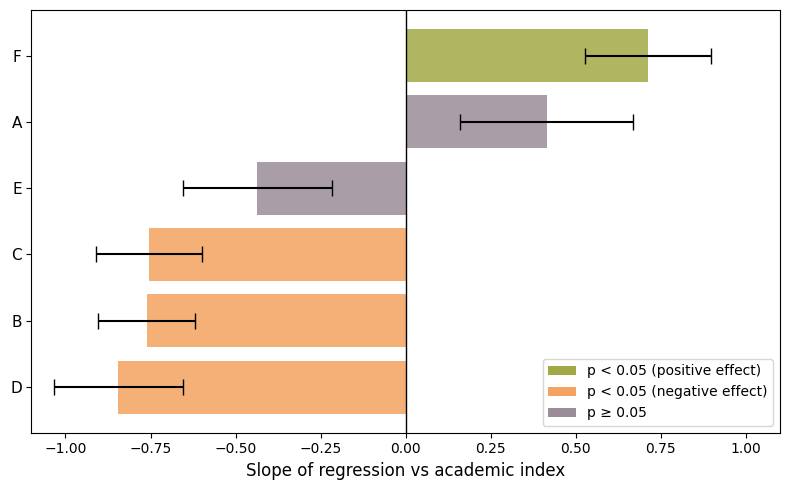

In [532]:



# Construimos DataFrame con slopes, errores y p-values
df_slopes = pd.DataFrame({
    "slope": slopes,
    "error": errors,
    "pvalue": {factor: sm.OLS(df_corr[factor].values, 
                              sm.add_constant(df_corr["Indice_Normalizado"].values)).fit().pvalues[1]
               for factor in slopes.keys()}
}).sort_values("slope")

# Colores según significancia
colors = []
for s, p in zip(df_slopes["slope"], df_slopes["pvalue"]):
    if p < 0.05:  # significativo
        colors.append("#A3A847" if s > 0 else "#F4A261")
    else:         # no significativo
        colors.append("#9A8C98")

plt.figure(figsize=(8, 5))

plt.barh(
    df_slopes.index,
    df_slopes["slope"],
    xerr=df_slopes["error"],
    color=colors,
    alpha=0.85,        # << controla transparencia de la barra
    capsize=6,
    ecolor="black",
    linewidth=1
)

plt.axvline(0, color='black', linewidth=1)
plt.xlim(-1.1,+1.1)
plt.xlabel("Slope of regression vs academic index", fontsize=12)
plt.yticks(fontsize=11)
plt.legend()

# Añadir p-values al lado de cada barra
# for i, (val, p) in enumerate(zip(df_slopes["slope"], df_slopes["pvalue"])):
#     plt.text(val + np.sign(val)*0.01, i, f"p={p:.3f}", va='top', fontsize=9)

legend_elements = [
    Patch(facecolor="#A3A847", label="p < 0.05 (positive effect)"),
    Patch(facecolor="#F4A261", label="p < 0.05 (negative effect)"),
    Patch(facecolor="#9A8C98", label="p ≥ 0.05")
]

plt.legend(handles=legend_elements, fontsize=10, loc="lower right")


plt.tight_layout()
plt.show()


In [438]:
df_slopes


slope     error    pvalue
Population with low education                    -0.844389  0.188831  0.002079
Average income per person                        -0.761516  0.143392  0.000719
Low-skilled workers                              -0.755098  0.156601  0.001318
Employed population                              -0.436700  0.219279  0.081580
Young population without post-compulsory studies  0.414305  0.254619  0.142355
Foreigners from low- or middle-income countries   0.710971  0.185069  0.004936

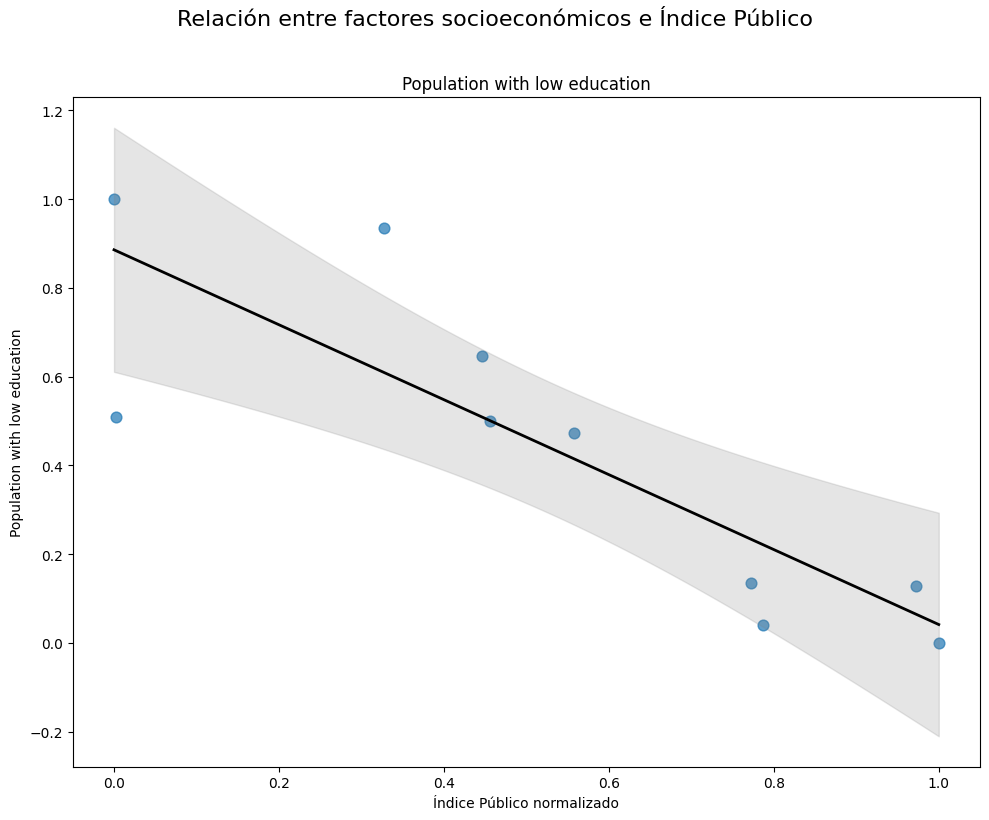

In [429]:
slopes = {}
errors = {}

factor="Population with low education"

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

X = df_corr["Indice_Normalizado"].values
y = df_corr[factor].values

# Añadir constante para statsmodels
X_sm = sm.add_constant(X)

model = sm.OLS(y, X_sm).fit()

# Guardar pendiente y error estándar
slopes[factor] = model.params[1]
errors[factor] = model.bse[1]

# Predicciones con intervalo de confianza
x_pred = np.linspace(X.min(), X.max(), 200)
X_pred = sm.add_constant(x_pred)
y_pred = model.predict(X_pred)
pred_ci = model.get_prediction(X_pred).conf_int()

# Plot puntos
ax.scatter(X, y, s=60, alpha=0.7)

# Recta
ax.plot(x_pred, y_pred, linewidth=2, color='black')

# Banda de error
ax.fill_between(x_pred,
                pred_ci[:, 0],
                pred_ci[:, 1],
                alpha=0.2,
                color='gray')

ax.set_title(factor, fontsize=12)
ax.set_xlabel("Índice Público normalizado")
ax.set_ylabel(factor)

plt.suptitle("Relación entre factores socioeconómicos e Índice Público", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


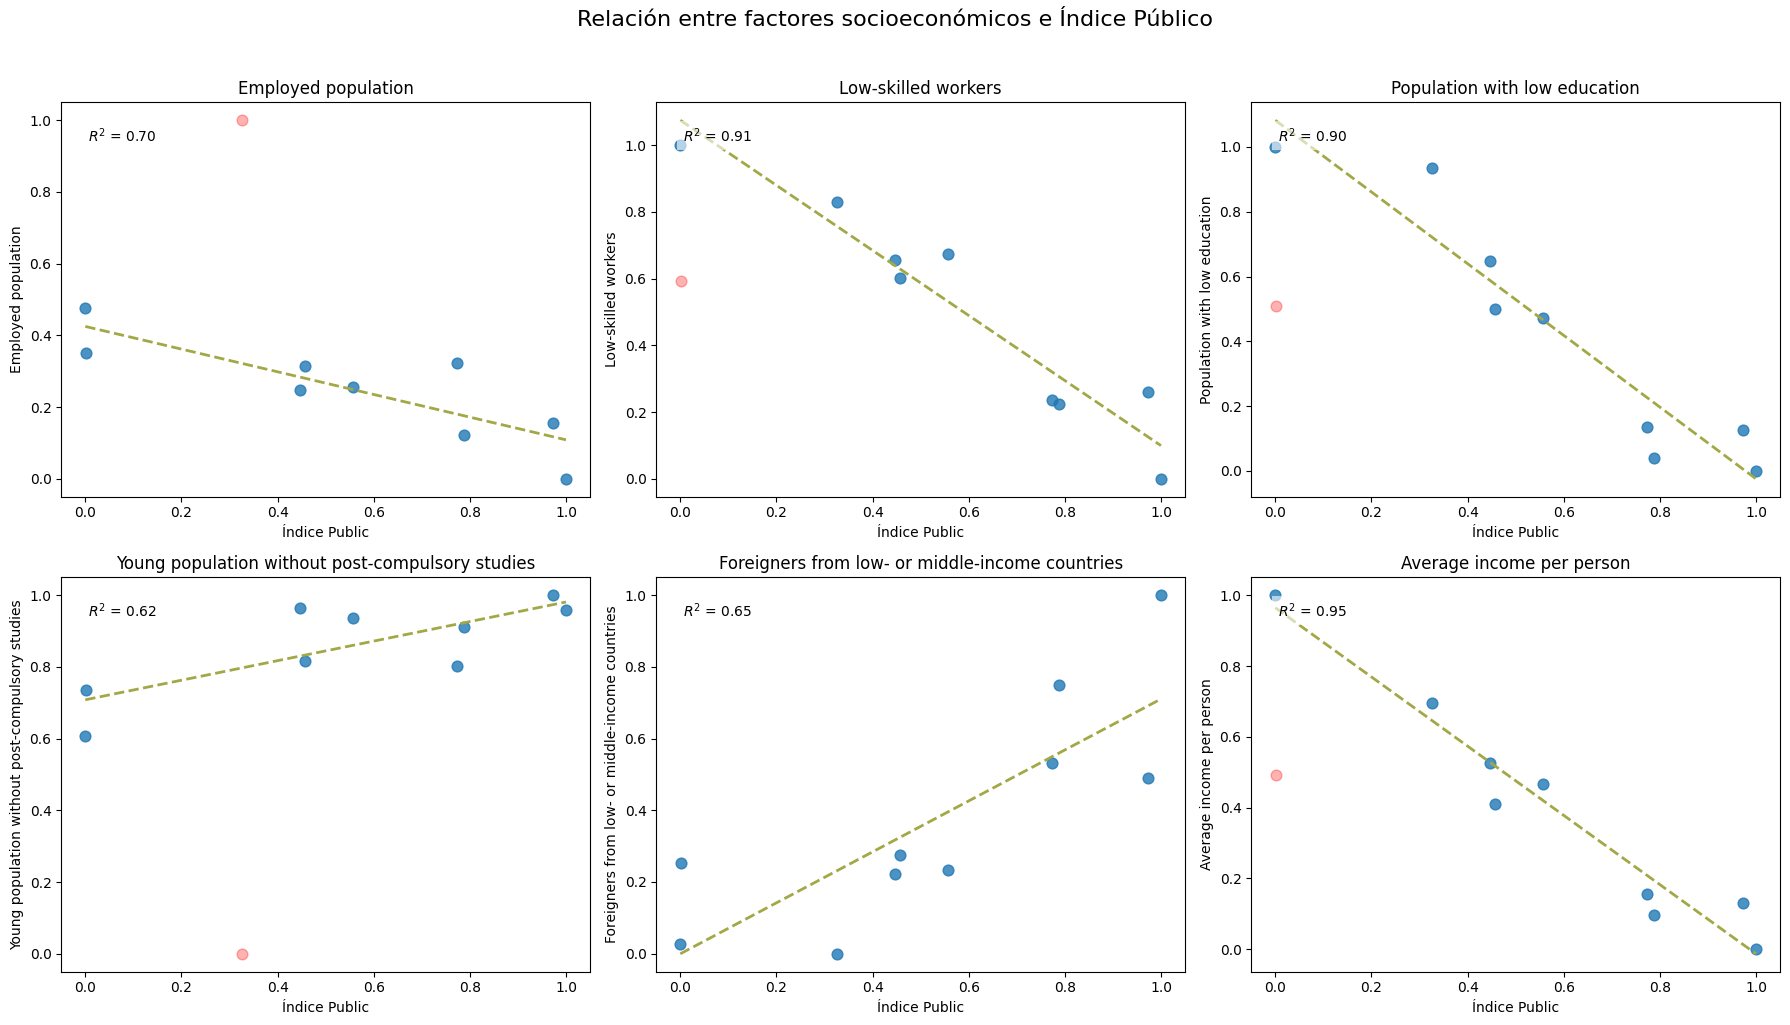

In [432]:



fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, factor in enumerate(cols_norm):
    ax = axes[i]

    X = df_corr["Indice_Normalizado"].values.reshape(-1, 1)
    y = df_corr[factor].values

    # --- 1. Ajuste lineal inicial
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # --- 2. Residuos y sigma
    residuals = y - y_pred
    sigma = np.std(residuals)

    # --- 3. Filtrar outliers (|residuo| > 2 sigma)
    mask = np.abs(residuals) < 2 * sigma
    X_f = X[mask]
    y_f = y[mask]

    # --- 4. Nuevo ajuste lineal sin outliers
    model_f = LinearRegression().fit(X_f, y_f)
    y_fit = model_f.predict(X_f)

    # --- 5. Plot
    ax.scatter(X_f, y_f, s=60, alpha=0.8, label='Datos sin outliers')
    ax.scatter(X[~mask], y[~mask], s=60, alpha=0.3, color='red', label='Outliers')  # opcional

    # Recta ajustada
    x_line = np.linspace(X_f.min(), X_f.max(), 100).reshape(-1, 1)
    y_line = model_f.predict(x_line)
    ax.plot(x_line, y_line, "--", color=color,linewidth=2)

    ax.set_title(factor, fontsize=12)
    ax.set_xlabel("Índice Public")
    ax.set_ylabel(factor)

    # Mostrar coeficiente y R²
    r2 = model_f.score(X_f, y_f)
    ax.text(0.05, 0.90, f"$R^2$ = {r2:.2f}",
            transform=ax.transAxes,
            fontsize=10, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

plt.suptitle("Relación entre factores socioeconómicos e Índice Público", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [433]:
# Filtrar y normalizar índices públicos
gdf_ist = gdf_ist.copy()

# Normalizar el índice entre 0 y 1
indice_public = gdf_publicos["Indice_Public"]
min_val = indice_public.min()
max_val = indice_public.max()

gdf_publicos["Indice_Normalizado"] = (indice_public - min_val) / (max_val - min_val)

# Crear centroides
gdf_publicos["centroid"] = gdf_publicos.geometry.centroid


NameError: name 'gdf_ist' is not defined

In [364]:
df_nivels=pd.read_csv("data_Ana/2022_pad_mdbas_niv-educa-esta_sexe.csv", delimiter=',')
df_nivels['Valor'] = (
    df_nivels['Valor']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .str.replace(' ', '', regex=False)     # por si hay espacios
)

df_nivels['Valor'] = pd.to_numeric(df_nivels['Valor'], errors='coerce')

df_reducido = df_nivels[[
    'Codi_Districte',
    'Nom_Districte',
    'NIV_EDUCA_esta',
    'Valor'
]]
df_agrupado = (
    df_reducido
    .groupby(['Codi_Districte', 'Nom_Districte', 'NIV_EDUCA_esta'], as_index=False)
    .agg({'Valor': 'sum'})
)

df_nivels = df_agrupado.copy()

df_nivels['Porcentaje'] = (
    df_nivels['Valor'] /
    df_nivels.groupby('Codi_Districte')['Valor'].transform('sum')
) * 100



df_nivels.head(10)

Codi_Districte Nom_Districte  NIV_EDUCA_esta    Valor  Porcentaje
0               1  Ciutat Vella               1   1072.0    1.131458
1               1  Ciutat Vella               2  19227.0   20.293419
2               1  Ciutat Vella               3  22468.0   23.714180
3               1  Ciutat Vella               4  20198.0   21.318275
4               1  Ciutat Vella               5  30823.0   32.532587
5               1  Ciutat Vella               6    957.0    1.010080
6               2      Eixample               1   1789.0    0.752538
7               2      Eixample               2  22675.0    9.538172
8               2      Eixample               3  39571.0   16.645424
9               2      Eixample               4  61407.0   25.830673

9,NIV_EDUCA_esta,1,Sense estudis,Sin estudios,Less than primary education
9,NIV_EDUCA_esta,2,"Estudis primaris, certificat d'escolaritat, EGB","Estudios primarios, certificado de escolaridad, EGB",Primary education
9,NIV_EDUCA_esta,3,"Batxillerat elemental, graduat escolar, ESO, FPI","Bachillerato elemental, graduado escolar, ESO, FPI",Lower secondary education
9,NIV_EDUCA_esta,4,"Batxillerat superior, BUP, COU, FPII, CFGM grau mitjà","Bachillerato superior, BUP, COU, FPII, CFGM grado medio",Upper secondary or post-secondary non-tertiary education
9,NIV_EDUCA_esta,5,"Estudis universitaris, CFGS grau superior","Estudios universitarios, CFGS grado superior",Tertiary education
9,NIV_EDUCA_esta,6,No consta,No consta,Not available

In [ ]:
# Unir los datos educativos con las geometrías
df_geo_edu = df_bcn_disctricts.merge(df_nivels, on='Codi_Districte', how='left')
df_geo_edu.head()

Codi_Districte nom_districte  \
0              1  Ciutat Vella   
1              1  Ciutat Vella   
2              1  Ciutat Vella   
3              1  Ciutat Vella   
4              1  Ciutat Vella   

                                    geometria_etrs89  \
0  POLYGON ((431733.736 4582441.816, 431557.5115 ...   
1  POLYGON ((431733.736 4582441.816, 431557.5115 ...   
2  POLYGON ((431733.736 4582441.816, 431557.5115 ...   
3  POLYGON ((431733.736 4582441.816, 431557.5115 ...   
4  POLYGON ((431733.736 4582441.816, 431557.5115 ...   

                                     geometria_wgs84  \
0  POLYGON ((2.18345134701381 41.3906119681235, 2...   
1  POLYGON ((2.18345134701381 41.3906119681235, 2...   
2  POLYGON ((2.18345134701381 41.3906119681235, 2...   
3  POLYGON ((2.18345134701381 41.3906119681235, 2...   
4  POLYGON ((2.18345134701381 41.3906119681235, 2...   

                                            geometry Nom_Districte  \
0  POLYGON ((2.18345 41.39061, 2.18132 41.39222, ...  Ciutat Vella   
1  POLYGON ((2.18345 41.39061, 2.18132 41.39222, ...  Ciutat Vella   
2  POLYGON ((2.18345 41.39061, 2.18132 41.39222, ...  Ciutat Vella   
3  POLYGON ((2.18345 41.39061, 2.18132 41.39222, ...  Ciutat Vella   
4  POLYGON ((2.18345 41.39061, 2.18132 41.39222, ...  Ciutat Vella   

   NIV_EDUCA_esta    Valor  Porcentaje  
0               1   1072.0    1.131458  
1               2  19227.0   20.293419  
2               3  22468.0   23.714180  
3               4  20198.0   21.318275  
4               5  30823.0   32.532587

In [114]:
gdf_publicos.head(2)

Codi_Districte nom_districte  \
0               1  Ciutat Vella   
1               2      Eixample   

                                    geometria_etrs89  \
0  POLYGON ((431733.736 4582441.816, 431557.5115 ...   
1  POLYGON ((432033.1836 4583665.0318, 431837.083...   

                                     geometria_wgs84  \
0  POLYGON ((2.18345134701381 41.3906119681235, 2...   
1  POLYGON ((2.18689546486771 41.4016544763739, 2...   

                                            geometry  Indice_Public  \
0  POLYGON ((2.18345 41.39061, 2.18132 41.39222, ...       0.764286   
1  POLYGON ((2.1869 41.40165, 2.18453 41.40345, 2...       0.819287   

   Indice_Privat                  centroid  Indice_Normalizado  
0       0.837433  POINT (2.18073 41.38113)            0.326954  
1       0.907694  POINT (2.16447 41.39159)            0.772557

In [115]:
# Unir resultados académicos con datos educativos
df_nivels['Codi_Districte'] = df_nivels['Codi_Districte'].astype(int)


# Filtrar niveles 2-5 (omitir 1 y 6)
df_nivels_filtrado = df_nivels[df_nivels['NIV_EDUCA_esta'].between(2, 5)].copy()

# Recalcular porcentajes dentro de los niveles 2-5 para cada distrito
total_por_distrito = df_nivels_filtrado.groupby('Codi_Districte')['Valor'].transform('sum')
df_nivels_filtrado['Porcentaje_ajustado'] = (df_nivels_filtrado['Valor'] / total_por_distrito) * 100

# Unir con resultados académicos
df_comparativa = df_nivels_filtrado.merge(
    gdf_publicos[['Codi_Districte', 'Indice_Public']].rename(columns={'porcentaje': 'porcentaje_promocion'}),
    on='Codi_Districte',
    how='left'
)

# Ordenar distritos por porcentaje de promoción
orden_distritos = gdf_publicos.sort_values('Indice_Public', ascending=False)['nom_districte'].values
df_comparativa['Nom_Districte'] = pd.Categorical(
    df_comparativa['Nom_Districte'], 
    categories=orden_distritos, 
    ordered=True
)

In [117]:
pivot_ordenado

NIV_EDUCA_esta               2          3          4          5
Nom_Districte                                                  
Sarrià-Sant Gervasi   5.237325  12.110443  27.909420  54.742812
Gràcia               10.044353  17.190487  26.357345  46.407815
Les Corts             9.569232  16.157453  27.689754  46.583561
Eixample              9.701116  16.929784  26.271948  47.097152
Horta-Guinardó       17.313033  26.095276  28.105528  28.486163
Sant Martí           17.592449  25.309993  26.184007  30.913551
Sant Andreu          18.464971  27.224457  28.060103  26.250470
Ciutat Vella         20.737521  24.233142  21.784805  33.244532
Sants-Montjuïc       18.995544  24.852323  25.860598  30.291534
Nou Barris           25.272472  32.480263  25.315185  16.932079

C:\Users\anica\AppData\Local\Temp\ipykernel_39640\350139339.py:2: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



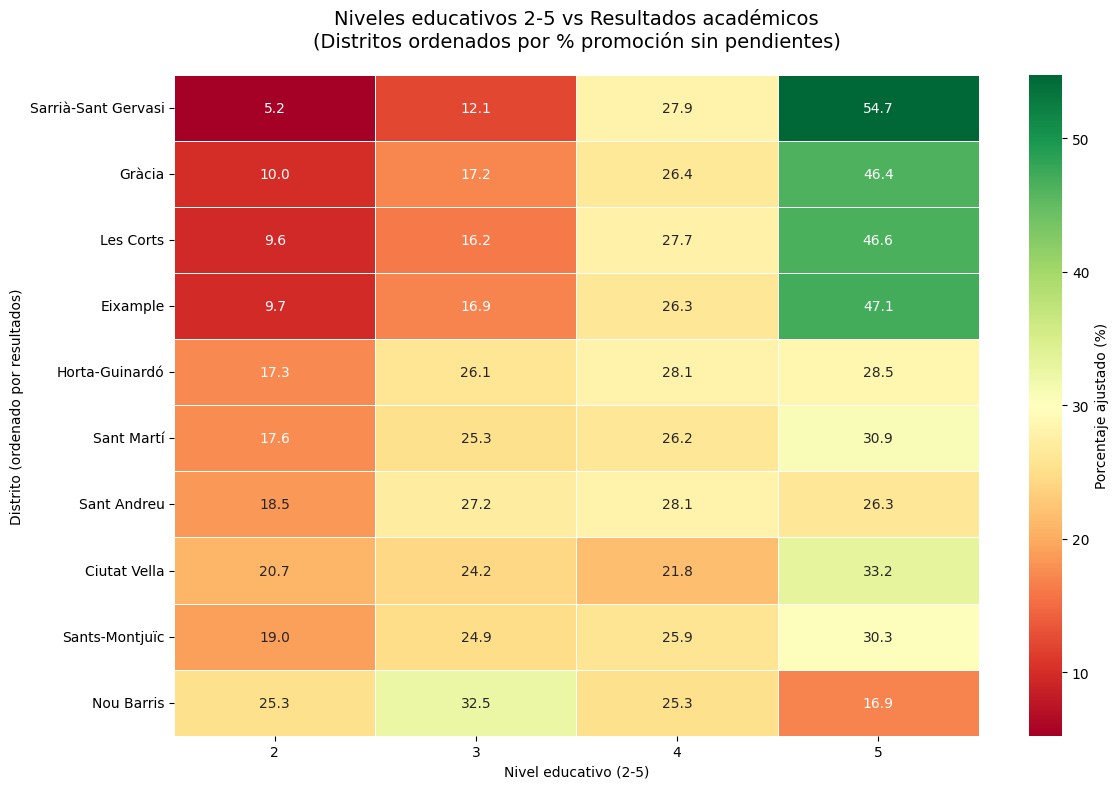

In [116]:
# Crear pivot table con niveles 2-5 ordenada por resultados académicos
pivot_ordenado = df_comparativa.pivot_table(
    index='Nom_Districte', 
    columns='NIV_EDUCA_esta', 
    values='Porcentaje_ajustado'
).reindex(orden_distritos)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_ordenado, 
            annot=True, 
            cmap='RdYlGn', 
            fmt='.1f',
            cbar_kws={'label': 'Porcentaje ajustado (%)'},
            linewidths=0.5)
plt.title('Niveles educativos 2-5 vs Resultados académicos\n(Distritos ordenados por % promoción sin pendientes)',
          fontsize=14, pad=20)
plt.xlabel('Nivel educativo (2-5)')
plt.ylabel('Distrito (ordenado por resultados)')
plt.tight_layout()
plt.show()

C:\Users\anica\AppData\Local\Temp\ipykernel_39640\1358050000.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



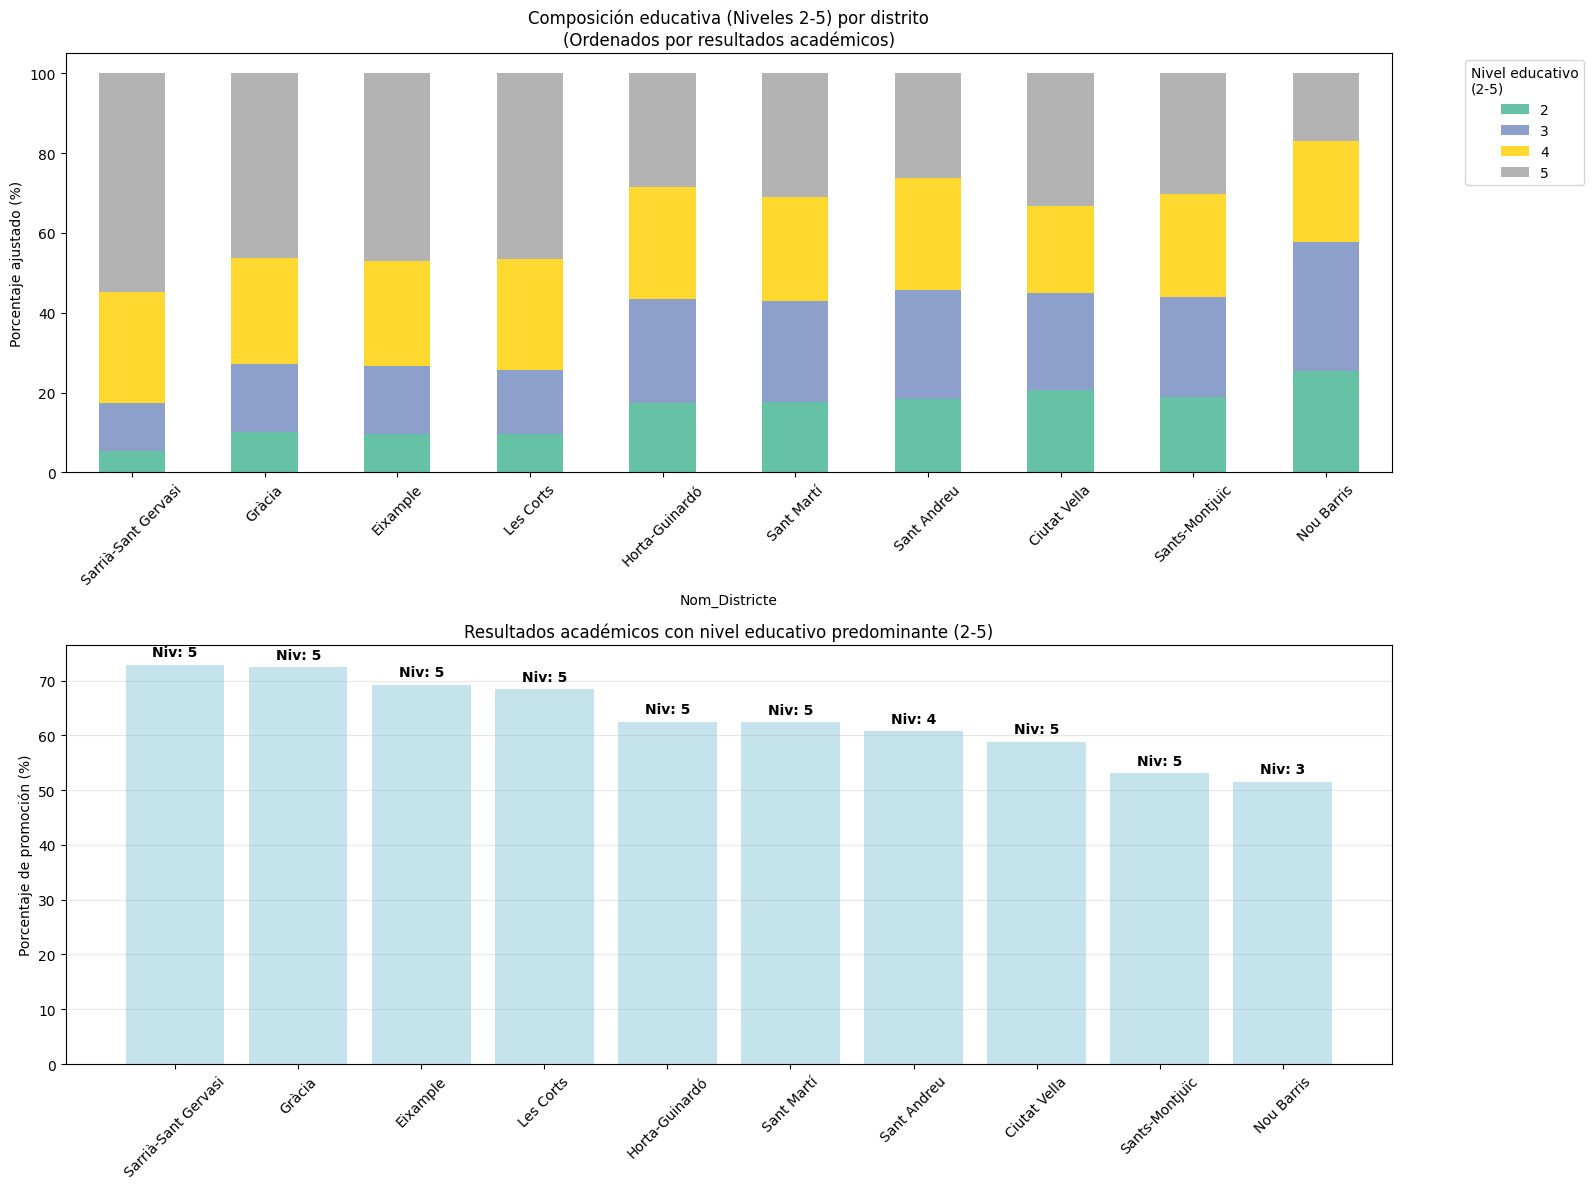

In [51]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Gráfico 1: Composición educativa (niveles 2-5) ordenada por resultados
pivot_ordenado.plot(kind='bar', stacked=True, ax=ax1, colormap='Set2')
ax1.set_title('Composición educativa (Niveles 2-5) por distrito\n(Ordenados por resultados académicos)')
ax1.set_ylabel('Porcentaje ajustado (%)')
ax1.legend(title='Nivel educativo\n(2-5)', bbox_to_anchor=(1.05, 1))
ax1.tick_params(axis='x', rotation=45)

# Gráfico 2: Resultados académicos vs Nivel educativo predominante (2-5)
nivel_predominante = df_comparativa.loc[df_comparativa.groupby('Nom_Districte')['Porcentaje_ajustado'].idxmax()]
nivel_predominante = nivel_predominante.set_index('Nom_Districte').reindex(orden_distritos)

# Barras de resultados académicos
bars = ax2.bar(nivel_predominante.index, 
               nivel_predominante['porcentaje_promocion'],
               color='lightblue', alpha=0.7)

# Añadir etiquetas con el nivel educativo predominante
for i, (bar, distrito) in enumerate(zip(bars, nivel_predominante.index)):
    nivel_pred = nivel_predominante.loc[distrito, 'NIV_EDUCA_esta']
    altura = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, altura + 1, 
             f'Niv: {nivel_pred}', ha='center', va='bottom', fontweight='bold')

ax2.set_title('Resultados académicos con nivel educativo predominante (2-5)')
ax2.set_ylabel('Porcentaje de promoción (%)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\anica\AppData\Local\Temp\ipykernel_39640\2388407008.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



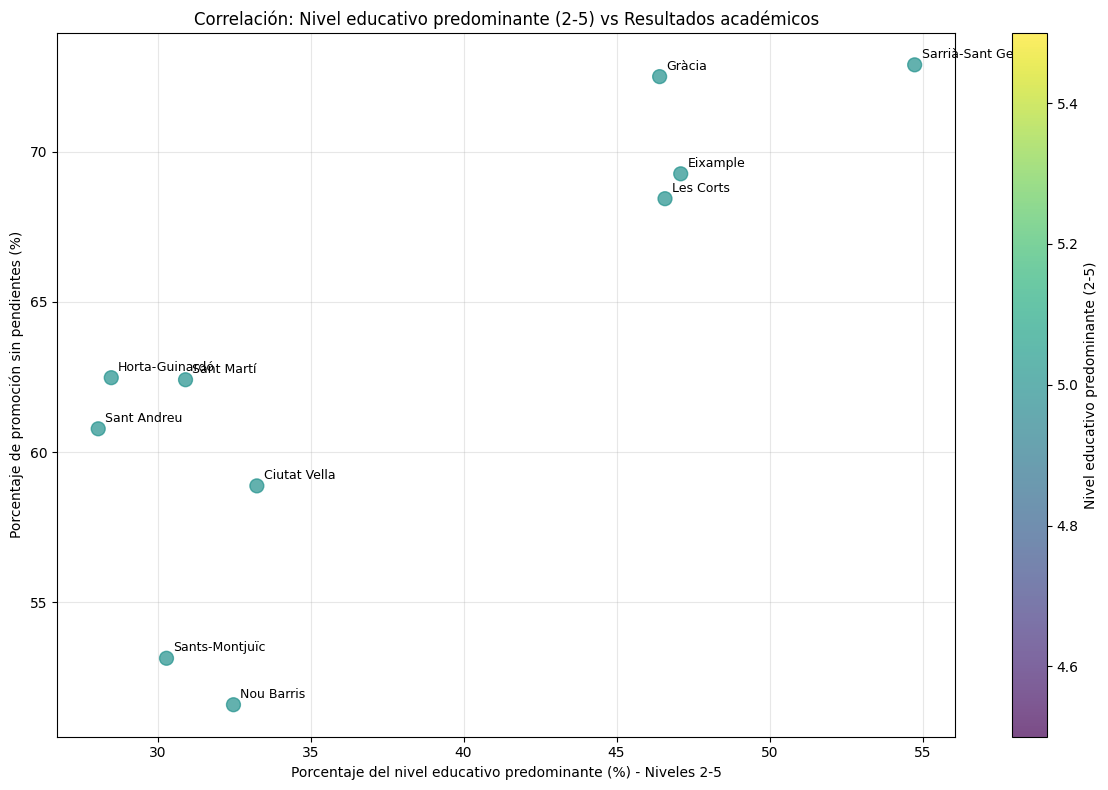

In [52]:
# Calcular métricas por distrito (solo niveles 2-5)
metricas_distritos = df_comparativa.groupby('Nom_Districte').agg({
    'porcentaje_promocion': 'first',
    'Porcentaje_ajustado': lambda x: x.iloc[x.argmax()],  # Porcentaje del nivel predominante
    'NIV_EDUCA_esta': lambda x: x.iloc[x.argmax()]  # Nivel predominante (2-5)
}).reset_index()

# Ordenar por resultados
metricas_distritos = metricas_distritos.sort_values('porcentaje_promocion', ascending=False)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(metricas_distritos['Porcentaje_ajustado'], 
                      metricas_distritos['porcentaje_promocion'],
                      c=metricas_distritos['NIV_EDUCA_esta'], 
                      cmap='viridis', s=100, alpha=0.7)

# Añadir etiquetas de distritos
for i, row in metricas_distritos.iterrows():
    plt.annotate(row['Nom_Districte'], 
                (row['Porcentaje_ajustado'], row['porcentaje_promocion']),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.colorbar(scatter, label='Nivel educativo predominante (2-5)')
plt.xlabel('Porcentaje del nivel educativo predominante (%) - Niveles 2-5')
plt.ylabel('Porcentaje de promoción sin pendientes (%)')
plt.title('Correlación: Nivel educativo predominante (2-5) vs Resultados académicos')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [56]:
metricas_distritos

Nom_Districte  porcentaje_promocion  Porcentaje_ajustado  \
0  Sarrià-Sant Gervasi             72.895863            54.742812   
1               Gràcia             72.503083            46.407815   
2             Eixample             69.266247            47.097152   
3            Les Corts             68.437500            46.583561   
4       Horta-Guinardó             62.475442            28.486163   
5           Sant Martí             62.407603            30.913551   
6          Sant Andreu             60.773481            28.060103   
7         Ciutat Vella             58.872180            33.244532   
8       Sants-Montjuïc             53.130288            30.291534   
9           Nou Barris             51.582868            32.480263   

   NIV_EDUCA_esta  
0               5  
1               5  
2               5  
3               5  
4               5  
5               5  
6               5  
7               5  
8               5  
9               5

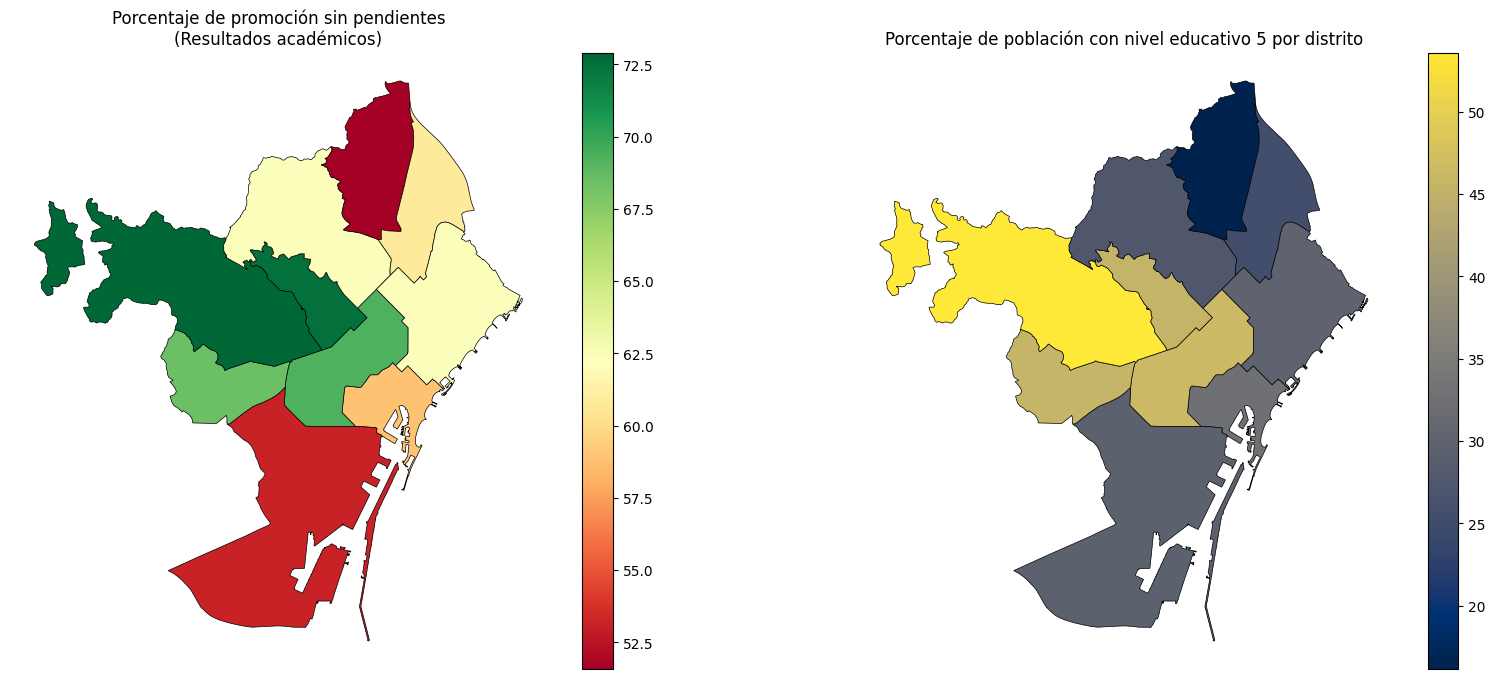

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Mapa 1: Resultados académicos
gdf_publicos.plot(column='porcentaje', 
                  ax=ax1, 
                  legend=True,
                  cmap='RdYlGn',
                  edgecolor='black',
                  linewidth=0.5)
ax1.set_title('Porcentaje de promoción sin pendientes\n(Resultados académicos)')
ax1.axis('off')



nivel = 5  # por ejemplo, nivel 1
df_nivel = df_geo_edu[df_geo_edu['NIV_EDUCA_esta'] == nivel]

colorblind_cmap = mcolors.ListedColormap(sns.color_palette("colorblind"))

df_nivel.plot(column='Porcentaje', 
              ax=ax2, 
              legend=True,
              cmap='cividis',
              edgecolor='black',
              linewidth=0.5)
ax2.set_title(f'Porcentaje de población con nivel educativo {nivel} por distrito')
ax2.axis('off')
plt.show()




In [60]:
# Crear tabla resumen ordenada por resultados
resumen = metricas_distritos[['Nom_Districte', 'porcentaje_promocion', 
                             'NIV_EDUCA_esta', 'Porcentaje_ajustado']].round(1)
resumen.columns = ['Distrito', '% Promoción', 'Nivel Pred (2-5)', '% Nivel Pred']
resumen['Ranking'] = range(1, len(resumen) + 1)

print("Ranking de distritos por resultados académicos (Niveles educativos 2-5):")
print(resumen.to_string(index=False))

# Estadísticas descriptivas
print("\n" + "="*50)
print("Resumen estadístico - Niveles 2-5:")
print(f"Nivel educativo predominante más frecuente: {metricas_distritos['NIV_EDUCA_esta'].mode().values[0]}")
print(f"Rango de niveles predominantes: {metricas_distritos['NIV_EDUCA_esta'].min()} - {metricas_distritos['NIV_EDUCA_esta'].max()}")

Ranking de distritos por resultados académicos (Niveles educativos 2-5):
           Distrito  % Promoción  Nivel Pred (2-5)  % Nivel Pred  Ranking
Sarrià-Sant Gervasi         72.9                 5          54.7        1
             Gràcia         72.5                 5          46.4        2
           Eixample         69.3                 5          47.1        3
          Les Corts         68.4                 5          46.6        4
     Horta-Guinardó         62.5                 5          28.5        5
         Sant Martí         62.4                 5          30.9        6
        Sant Andreu         60.8                 5          28.1        7
       Ciutat Vella         58.9                 5          33.2        8
     Sants-Montjuïc         53.1                 5          30.3        9
         Nou Barris         51.6                 5          32.5       10

Resumen estadístico - Niveles 2-5:
Nivel educativo predominante más frecuente: 5
Rango de niveles predominantes:

In [61]:
# Calcular coeficiente de correlación
correlacion = metricas_distritos['porcentaje_promocion'].corr(metricas_distritos['NIV_EDUCA_esta'])
correlacion_porcentaje = metricas_distritos['porcentaje_promocion'].corr(metricas_distritos['Porcentaje_ajustado'])

print(f"\nCorrelaciones (Niveles 2-5):")
print(f"Correlación resultados vs nivel predominante: {correlacion:.3f}")
print(f"Correlación resultados vs % nivel predominante: {correlacion_porcentaje:.3f}")

# Interpretación
if abs(correlacion) > 0.7:
    fuerza = "fuerte"
elif abs(correlacion) > 0.5:
    fuerza = "moderada"
elif abs(correlacion) > 0.3:
    fuerza = "débil"
else:
    fuerza = "muy débil o nula"

print(f"Interpretación: {fuerza} correlación entre nivel educativo y resultados académicos")


Correlaciones (Niveles 2-5):
Correlación resultados vs nivel predominante: nan
Correlación resultados vs % nivel predominante: 0.818
Interpretación: muy débil o nula correlación entre nivel educativo y resultados académicos


c:\Users\anica\anaconda3\envs\environment\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning:

invalid value encountered in divide

c:\Users\anica\anaconda3\envs\environment\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning:

invalid value encountered in divide



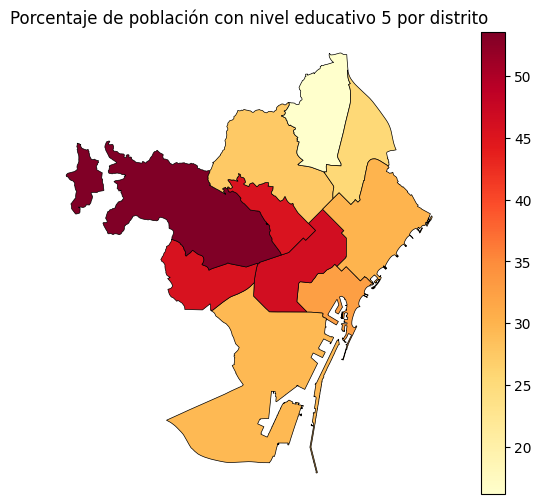

In [43]:


# Filtrar para un nivel educativo específico
nivel = 5  # por ejemplo, nivel 1
df_nivel = df_geo_edu[df_geo_edu['NIV_EDUCA_esta'] == nivel]

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
df_nivel.plot(column='Porcentaje', 
              ax=ax, 
              legend=True,
              cmap='YlOrRd',
              edgecolor='black',
              linewidth=0.5)
ax.set_title(f'Porcentaje de población con nivel educativo {nivel} por distrito')
ax.axis('off')
plt.show()

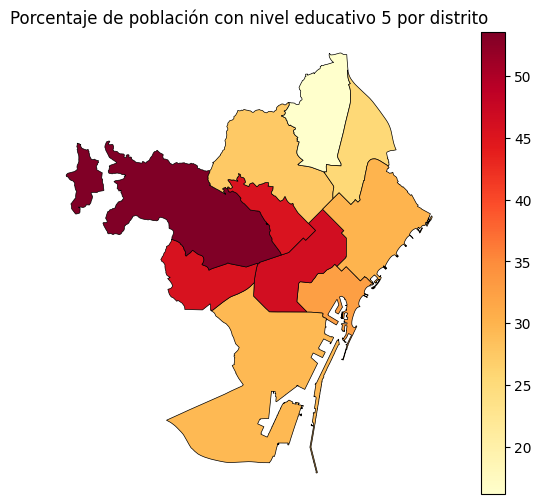

In [ ]:


# Filtrar para un nivel educativo específico
nivel = 5  # por ejemplo, nivel 1
df_nivel = df_geo_edu[df_geo_edu['NIV_EDUCA_esta'] == nivel]

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
df_nivel.plot(column='Porcentaje', 
              ax=ax, 
              legend=True,
              cmap='YlOrRd',
              edgecolor='black',
              linewidth=0.5)
ax.set_title(f'Porcentaje de población con nivel educativo {nivel} por distrito')
ax.axis('off')
plt.show()

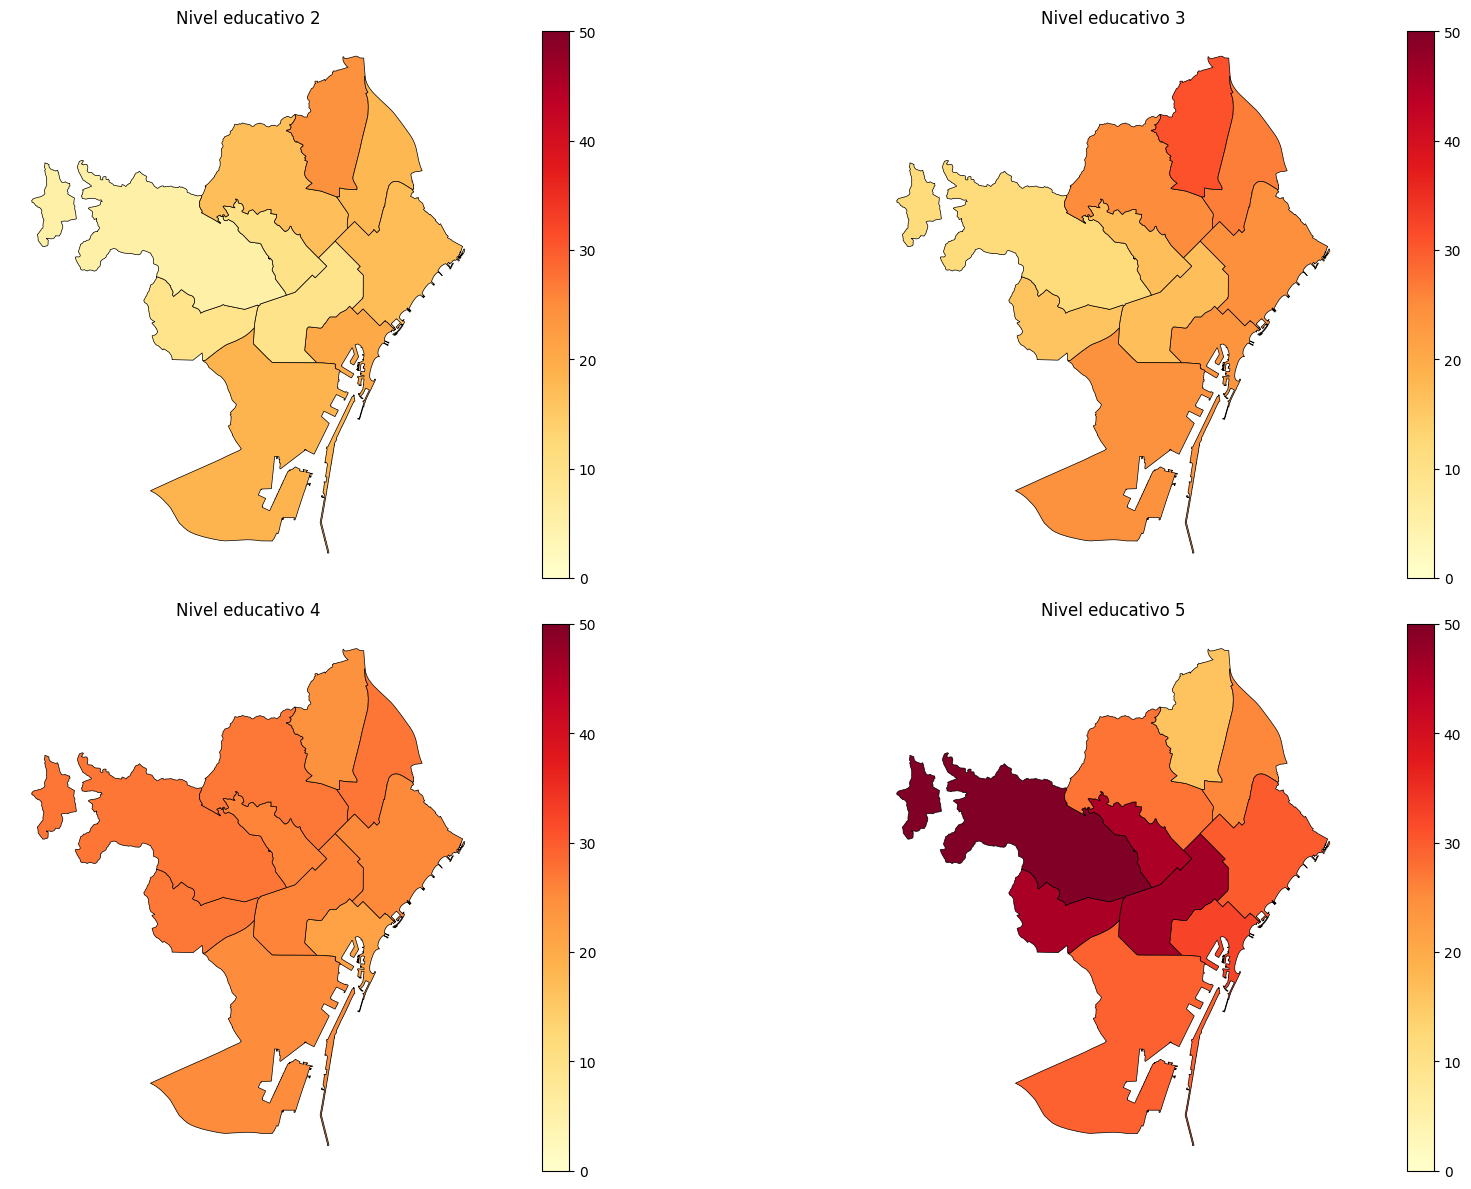

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()

for i, nivel in enumerate(range(2, 6)):
    df_nivel = df_geo_edu[df_geo_edu['NIV_EDUCA_esta'] == nivel]
    df_nivel.plot(column='Porcentaje', 
                  ax=axes[i], 
                  legend=True,
                  cmap='YlOrRd',
                  edgecolor='black',
                  vmax=50,
                  vmin=0,
                  linewidth=0.5)
    axes[i].set_title(f'Nivel educativo {nivel}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

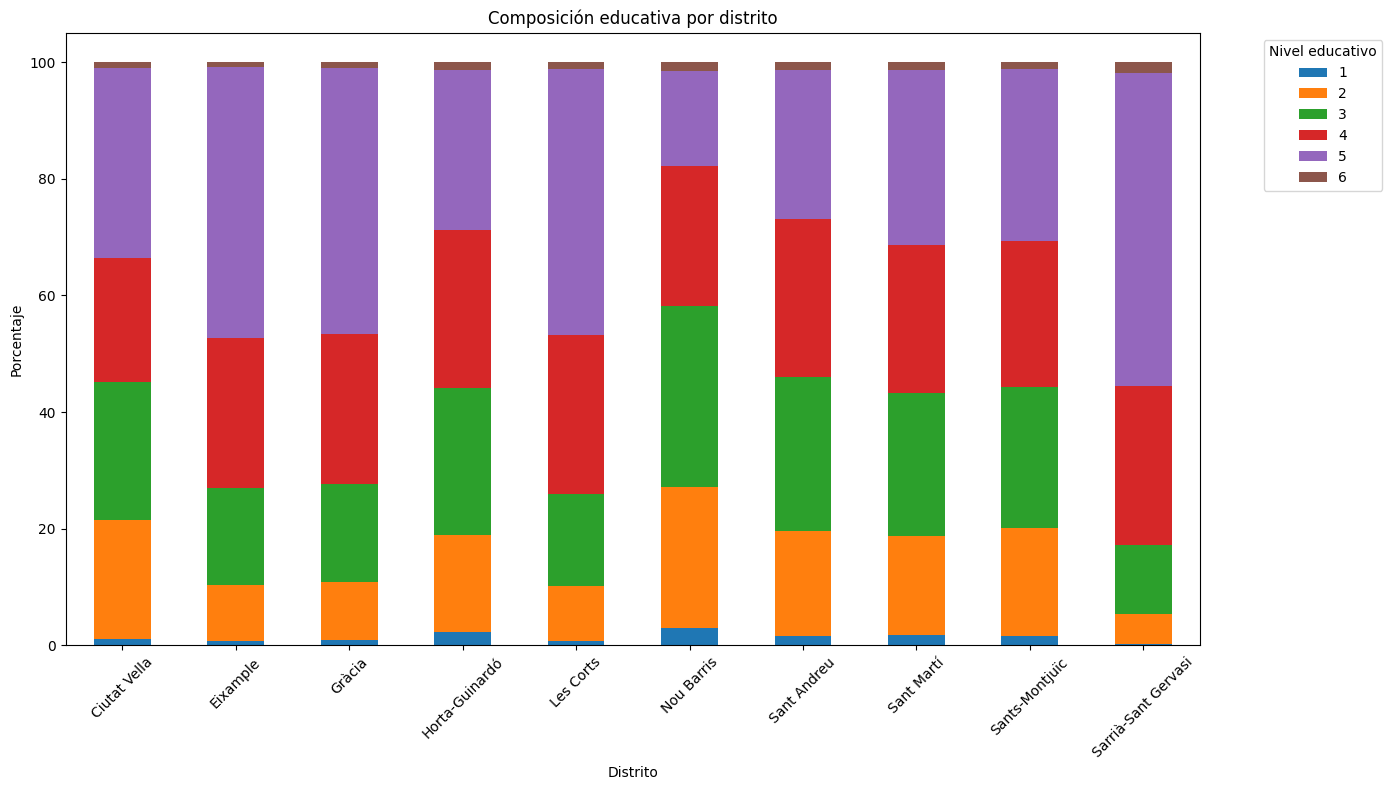

In [32]:
# Pivot table para tener niveles como columnas
pivot_df = df_nivels.pivot_table(index='Nom_Districte', 
                                columns='NIV_EDUCA_esta', 
                                values='Porcentaje')

plt.figure(figsize=(14, 8))
pivot_df.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Composición educativa por distrito')
plt.ylabel('Porcentaje')
plt.xlabel('Distrito')
plt.legend(title='Nivel educativo', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

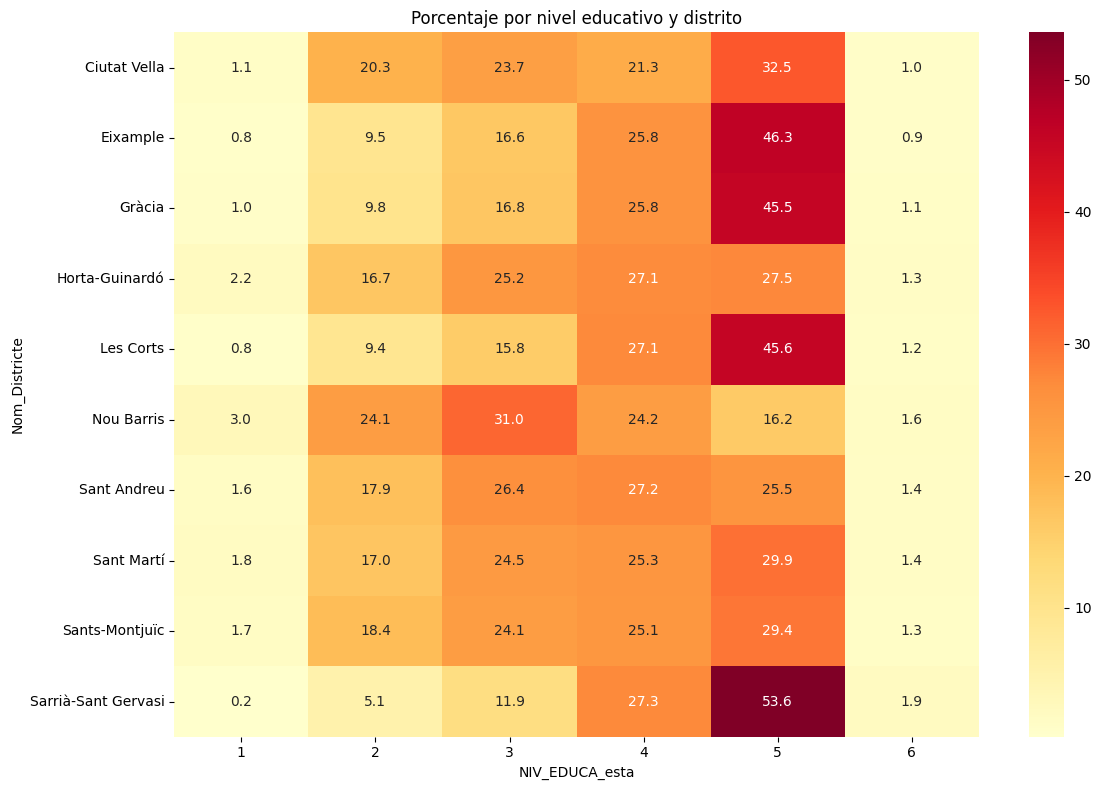

In [ ]:

plt.figure(figsize=(12, 8))
pivot_data = df_nivels.pivot_table(index='Nom_Districte', 
                                  columns='NIV_EDUCA_esta', 
                                  values='Porcentaje')
sns.heatmap(pivot_data, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Porcentaje por nivel educativo y distrito')
plt.tight_layout()
plt.show()

In [ ]:


# Gráfico interactivo de barras
fig = px.bar(df_nivels, 
             x='Nom_Districte', 
             y='Porcentaje', 
             color='NIV_EDUCA_esta',
             title='Distribución educativa por distrito',
             labels={'NIV_EDUCA_esta': 'Nivel educativo'})
fig.show()

In [ ]:


# Centro de Barcelona
m = folium.Map(location=[41.3851, 2.1734], zoom_start=11)

# Añadir capa coroplética para un nivel
nivel_interes = 3
df_nivel = df_geo_edu[df_geo_edu['NIV_EDUCA_esta'] == nivel_interes]

folium.Choropleth(
    geo_data=df_nivel,
    data=df_nivel,
    columns=['Codi_Districte', 'Porcentaje'],
    key_on='feature.properties.Codi_Districte',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name=f'Porcentaje nivel {nivel_interes}',
    highlight=True
).add_to(m)

# Añadir tooltips
folium.features.GeoJson(
    df_nivel,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['Nom_Districte', 'Porcentaje'],
        aliases=['Distrito:', 'Porcentaje:'],
        localize=True
    )
).add_to(m)

m

In [ ]:


# Crear mapa
m = folium.Map(location=[41.3851, 2.1734], zoom_start=11)

# Datos para un nivel
nivel_interes = 1
df_nivel = df_geo_edu[df_geo_edu['NIV_EDUCA_esta'] == nivel_interes].copy()

# Asegurarse de que los datos son numéricos
df_nivel['Porcentaje'] = pd.to_numeric(df_nivel['Porcentaje'], errors='coerce')

# Capa coroplética
folium.Choropleth(
    geo_data=df_nivel.__geo_interface__,
    data=df_nivel,
    columns=['Codi_Districte', 'Porcentaje'],
    key_on='feature.properties.Codi_Districte',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name=f'Porcentaje nivel {nivel_interes} (%)',
    nan_fill_color='white'
).add_to(m)

# Tooltips
for idx, row in df_nivel.iterrows():
    folium.GeoJson(
        row.geometry,
        tooltip=folium.Tooltip(
            f"<b>{row['Nom_Districte']}</b><br>"
            f"Porcentaje: {row['Porcentaje']:.1f}%"
        )
    ).add_to(m)

# Guardar como HTML
m.save('mapa_educacion_barcelona.html')
print("Mapa guardado como 'mapa_educacion_barcelona.html' - Ábrelo en tu navegador")

Mapa guardado como 'mapa_educacion_barcelona.html' - Ábrelo en tu navegador
